<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        👥 Customer Churn Prediction 🏃‍♂️
    </h1>
</div>


# Overview

**Background**

This dataset contains **customer records from a telecommunications company**.
It includes information about **demographics, account details, service subscriptions, and billing history**.

The dataset is designed for analyzing **customer churn** – identifying which customers are likely to **leave vs. stay** with the company.

Customer churn analysis is critical for telecom businesses due to:

* **High acquisition costs** for new customers.
* **Recurring revenue dependency**.
* **Competitive market pressure**.
* The need to develop **retention strategies**.

**Goal of the Project**

Build a machine learning model to:

* **Predict churn** based on customer and service attributes.
* Identify **key drivers of churn** (e.g., contract type, payment method, service usage).
* Provide insights for **improving customer retention and reducing revenue loss**.

**Key Features**

| Feature Name       | Description                                                            |
| ------------------ | ---------------------------------------------------------------------- |
| `customerID`       | Unique identifier for each customer                                  |
| `gender`           | Gender of the customer (Male/Female)                              |
| `SeniorCitizen`    | Indicates if the customer is a senior (1 = Yes, 0 = No)             |
| `Partner`          | Whether the customer has a partner (Yes/No)                        |
| `Dependents`       | Whether the customer has dependents (Yes/No)                      |
| `tenure`           | Number of months the customer has stayed with the company           |
| `PhoneService`     | Whether the customer has a phone service                         |
| `MultipleLines`    | Indicates if the customer has multiple phone lines                |
| `InternetService`  | Type of internet service (DSL, Fiber optic, None)                   |
| `OnlineSecurity`   | Online security add-on (Yes/No)                                     |
| `OnlineBackup`     | Online backup add-on (Yes/No)                                       |
| `DeviceProtection` | Device protection add-on (Yes/No)                                  |
| `TechSupport`      | Technical support add-on (Yes/No)                                  |
| `StreamingTV`      | Streaming TV service (Yes/No)                                       |
| `StreamingMovies`  | Streaming movies service (Yes/No)                                   |
| `Contract`         | Contract type (Month-to-month, One year, Two year)                  |
| `PaperlessBilling` | Whether billing is paperless (Yes/No)                               |
| `PaymentMethod`    | Payment method (Credit card, Bank transfer, Electronic check, etc.) |
| `MonthlyCharges`   | Monthly charges billed to the customer                              |
| `TotalCharges`     | Total amount billed over tenure                                     |
| `Churn`            | Target variable: `Yes` = Churned, `No` = Active customer           |

**Files Provided**

* `customer_churn_data.csv`: Main dataset containing customer demographics, services, billing, and churn label.

**Project Objective**

The goal of this notebook is to **model and predict customer churn** for a telecom company.

**Key Steps**

* **Exploratory Data Analysis (EDA):**
  Analyze churn distribution, demographic patterns, and service usage.

* **Modeling:**
  Train and compare multiple models:

  * Logistic Regression / Random Forest / XGBoost
  * Ensemble methods to improve churn prediction

* **Evaluation Framework:**

  * **Cross-validation** for robust results.
  * **Churn-specific metrics:**

    * **AUC-ROC** for evaluating classification trade-offs.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [82]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

In [127]:
class Config:
    SEED = 42
    MAX_ITER = 50000
    N_SPLIT = 1
    TEST_SIZE = 0.2

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [83]:
# Load the datasets
df = pd.read_csv("customer_churn_data.csv")

# Verify shapes
print("Data Shape:", df.shape)

Data Shape: (5880, 21)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [84]:
# Display few rows of dataset
print("Data Preview:")
display(df.head())

Data Preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [85]:
df.columns = (
    df.columns
    .str.strip()
)

# Display information about the DataFrames
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **5880** samples with **20** columns, including the target variable `Churn`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `MonthlyCharges`, `TotalCharges`, `tenure`.
     - **Categorical features:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `Churn`.
   - The target variable is **categorical** variable.

**Data Completeness**  
   - The dataset have **no missing values**.
   - Data types are appropriate: numerical features are int64 and float64 and categorical features is object.

In [86]:
num_features = ["MonthlyCharges", "TotalCharges", "tenure"]
cat_features = ["customerID", "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df.drop(columns=cat_features, axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
tenure,5880.000000,36.549150,20.909674,1.000000,18.000000,37.000000,55.000000,72.000000
MonthlyCharges,5880.000000,70.157779,28.804615,20.000000,45.717500,70.155000,95.457500,119.990000
TotalCharges,5880.000000,2566.813165,1910.017743,20.030000,1020.217500,2136.445000,3767.665000,8589.600000


## Descriptive Insights – Numerical Features

**Tenure**

* **Mean \~ 36.5 months**, with std \~ 20.9 → indicates moderate variation.
* 50% of customers have tenure between **18 → 55 months** (Q1–Q3).
* **Min = 1, Max = 72 months** → includes both brand-new and long-term loyal customers.

**MonthlyCharges**

* **Mean \~ 70.2 USD**, with std \~ 28.8 → suggests significant variation across service bundles.
* 50% of customers pay **45.7 → 95.5 USD** per month (Q1–Q3).
* **Min = 20, Max \~ 120 USD** → most subscriptions fall within the common range of 20–120 USD.

**TotalCharges**

* **Mean \~ 2,566.8 USD**, with std \~ 1,910 → large variation driven by differences in **tenure**.
* 50% of customers have accumulated charges between **1,020 → 3,767 USD** (Q1–Q3).
* **Min \~ 20, Max \~ 8,590 USD** → reflects both new customers with small payments and long-term customers with very high spend.

In [87]:
# SeniorCitizen
choices_SeniorCitizen = ["No", "Yes"]
conditions = [
    (df["SeniorCitizen"] == 0),
    (df["SeniorCitizen"] == 1)
]
df["SeniorCitizen"] = np.select(conditions, choices_SeniorCitizen, default="Unknown")

def convert_cat(features, df = df):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
convert_cat(cat_features)

# Display information about the DataFrames
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5880 non-null   category
 1   gender            5880 non-null   category
 2   SeniorCitizen     5880 non-null   category
 3   Partner           5880 non-null   category
 4   Dependents        5880 non-null   category
 5   tenure            5880 non-null   int64   
 6   PhoneService      5880 non-null   category
 7   MultipleLines     5880 non-null   category
 8   InternetService   5880 non-null   category
 9   OnlineSecurity    5880 non-null   category
 10  OnlineBackup      5880 non-null   category
 11  DeviceProtection  5880 non-null   category
 12  TechSupport       5880 non-null   category
 13  StreamingTV       5880 non-null   category
 14  StreamingMovies   5880 non-null   category
 15  Contract          5880 non-null   category
 16  PaperlessBill

In [88]:
list_features_drop = ["MonthlyCharges", "TotalCharges", "tenure", "customerID", "Churn"]
print("Data describe:")
cat_summary = df.drop(columns=list_features_drop, axis=1).describe().T
cat_summary.style.background_gradient(cmap="Blues", subset=["unique", "freq"])

Data describe:


,count,unique,top,freq
gender,5880,2,Male,2950
SeniorCitizen,5880,2,Yes,2944
Partner,5880,2,Yes,2995
Dependents,5880,2,No,3004
PhoneService,5880,2,Yes,2941
MultipleLines,5880,3,No phone service,2939
InternetService,5880,3,No,2029
OnlineSecurity,5880,3,No internet service,2029
OnlineBackup,5880,3,No internet service,2029
DeviceProtection,5880,3,No internet service,2029


## Categorical Feature Insights

* **Gender**

  * 2 categories: Male (2,950) and Female (2,930).
  * The distribution is **balanced** between genders.
  * Gender is unlikely to be a strong predictor of churn.

* **SeniorCitizen**

  * 2 categories: Yes (2,944) and No (2,936).
  * Almost evenly split between senior and non-senior customers.
  * Provides potential insights on churn by **age group/life stage**.

* **Partner**

  * 2 categories: Yes (2,995), No (2,885).
  * Slightly more customers with partners.
  * Relationship status may correlate with **tenure stability**.

* **Dependents**

  * 2 categories: Yes (2,876), No (3,004).
  * Slightly more customers without dependents.
  * Indicates household structure could influence service retention.

* **PhoneService**

  * 2 categories: Yes (2,939), No (2,941).
  * Almost evenly distributed.
  * Suggests not all customers opt for traditional phone services.

* **MultipleLines**

  * 3 categories: Yes, No, No phone service.
  * **“No phone service” (2,939)** is the largest group.
  * Indicates that multiple lines are **not a dominant choice**.

* **InternetService**

  * 3 categories: DSL, Fiber optic, No.
  * **“No internet service” (2,029)** is the most common.
  * Internet plan type is expected to be a **major driver of churn**.

* **OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport / StreamingTV / StreamingMovies**

  * Each has 3 categories: Yes, No, No internet service.
  * In all these, **“No internet service” (2,029)** is dominant.
  * Lack of value-added services may increase churn probability.

* **Contract**

  * 3 categories: Month-to-month (2,920), One year, Two year.
  * **Month-to-month is the dominant group**, suggesting many customers prefer flexibility.
  * Customers with short contracts typically have **higher churn risk**.

* **PaperlessBilling**

  * 2 categories: Yes (2,890), No (2,990).
  * Distribution is nearly even.
  * Adoption of paperless billing may connect with **digital engagement level**.

* **PaymentMethod**

  * 4 categories: Credit card, Bank transfer, Electronic check, Mailed check.
  * **Credit card (1,503 customers)** is the most common.
  * Payment type can affect churn — e.g., **electronic check** is often linked with higher churn.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [89]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value dataset: ")
displayNULL(df, dataset_name="Dataset")

Missing value dataset: 
🔎 Missing Value Summary for: Dataset
✅ No missing values detected in 5,880 rows.


## Checking duplicate Value

In [90]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Data": df
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Data Duplicate Analysis
✅ No duplicates found in 5,880 rows



## Checking Outlier Value

In [91]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })

    if len(outlier_info) == 0:
        print("✅ No outliers detected in the selected features.")
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,TotalCharges,32


## Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values in the dataset.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

  * **No duplicates** detected in 2512 rows — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* The datasets contain **notable outliers** in `TotalCharges`.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [92]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [93]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", fontsize=14, weight="bold", pad=20)
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Churn Distribution

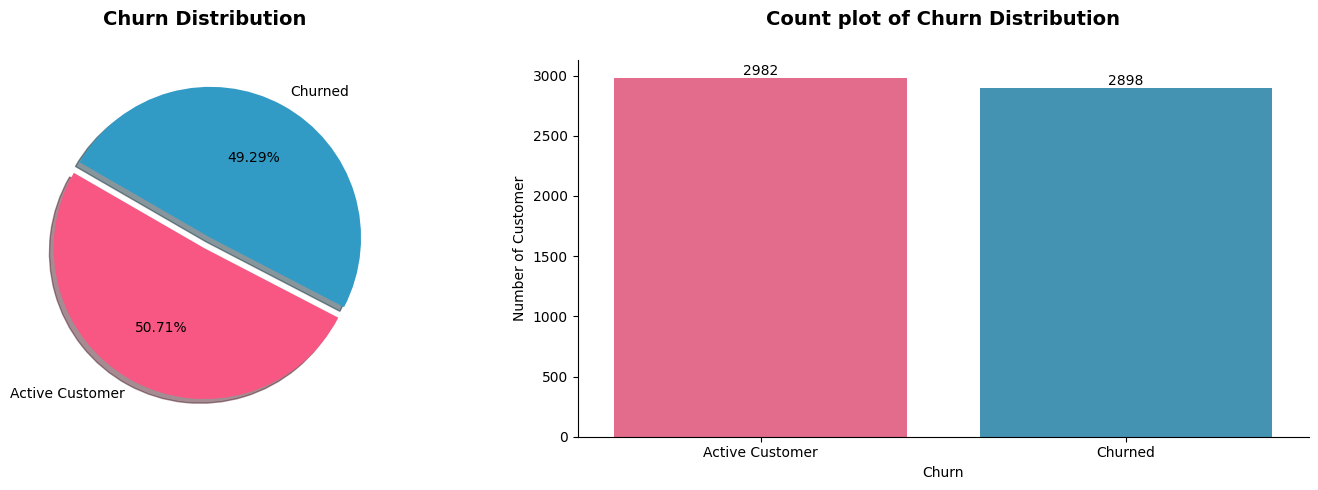

In [94]:
churn_Distribution  = df["Churn"].value_counts()
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
n_color = color(n_colors=df["Churn"].nunique())
# ax[0]
ax[0].pie(
    churn_Distribution,
    labels = ["Active Customer", "Churned"],
    colors = n_color,
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Churn Distribution",  weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df, x = "Churn", palette=n_color, 
              ax=ax[1])
ax[1].set_title("Count plot of Churn Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10)
ax[1].set_ylabel("Number of Customer")
ax[1].set_xticks([0, 1], ["Active Customer", "Churned"])
ax[1].set_xlabel("Churn")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

### Insights into Churn Distribution

**Frequency of churn categories**

* The pie chart and count plot illustrate the distribution of churn labels.
* `Active Customer` accounts for **2,982 records (\~50.71%)**.
* `Churned` customers account for **2,898 records (\~49.29%)**.

***The dataset is nearly balanced between churned and active customers. Unlike many real-world churn datasets (which are often heavily imbalanced), this balance provides a more favorable condition for modeling. Machine learning algorithms will not face a strong class bias, allowing for more reliable performance across both churn and non-churn predictions.***

## Numerical Feature Distributions

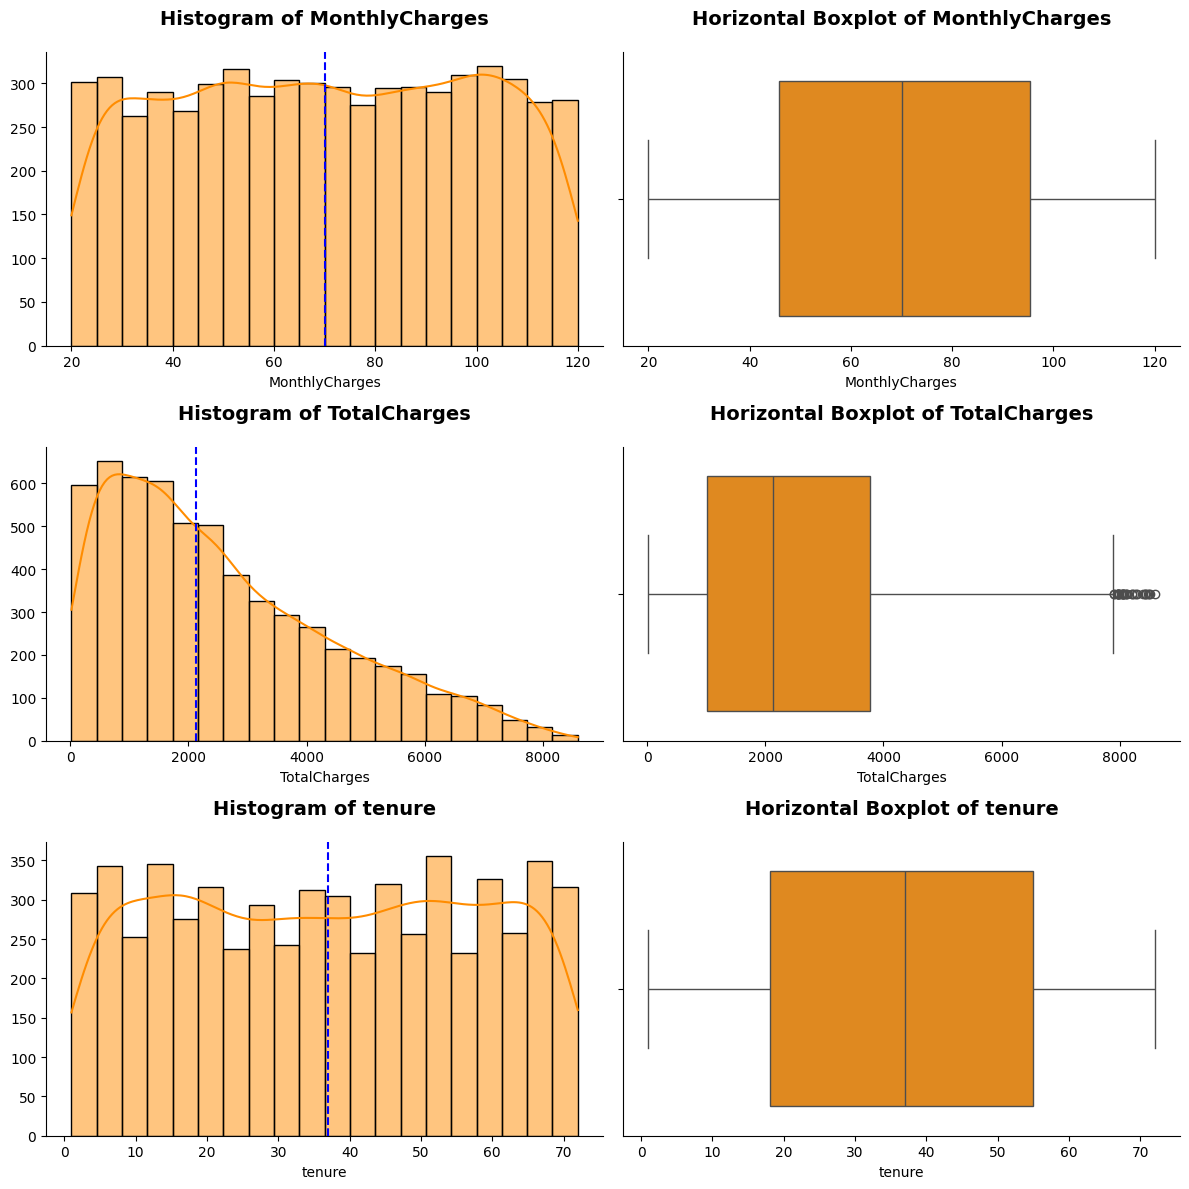

In [95]:
def plot_numerical_features(df=df, numerical_features = num_features):
    fig, ax = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="darkorange", bins = 20, kde=True, ax=ax[i, 0])
        ax[i, 0].set_title(f"Histogram of {feature}", weight="bold", fontsize=14, pad=20)
        ax[i, 0].set_ylabel("")
        ax[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")
        sns.despine(ax=ax[i, 0], top=True, right=True, left=False, bottom=False)

        sns.boxplot(data=df[feature], color="darkorange", orient="h", ax=ax[i, 1])
        ax[i, 1].set_title(f"Horizontal Boxplot of {feature}", weight="bold", fontsize=14, pad=20)
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True, left=False, bottom=False)


    plt.tight_layout()
    plt.show()
plot_numerical_features()

In [96]:
def check_skewness(data = df, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*75)
    print(f"{'Feature':<35} | {'Skewness':<10} | {'Remark'}")
    print("-"*75)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<35} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<35} | {skew:>+10f} | {remark}")
    print("-"*75)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
TotalCharges                        |  +0.814569 | Moderately skewed
MonthlyCharges                      |  -0.015878 | Approximately symmetric
tenure                              |  -0.003408 | Approximately symmetric
---------------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Boxplots** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The dataset’s numerical features (`tenure`, `MonthlyCharges`) are mostly balanced and approximately symmetric → favorable for modeling.
- Only `TotalCharges` shows moderate skewness, which should be addressed when included in the model (via transformation or scaling).

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y

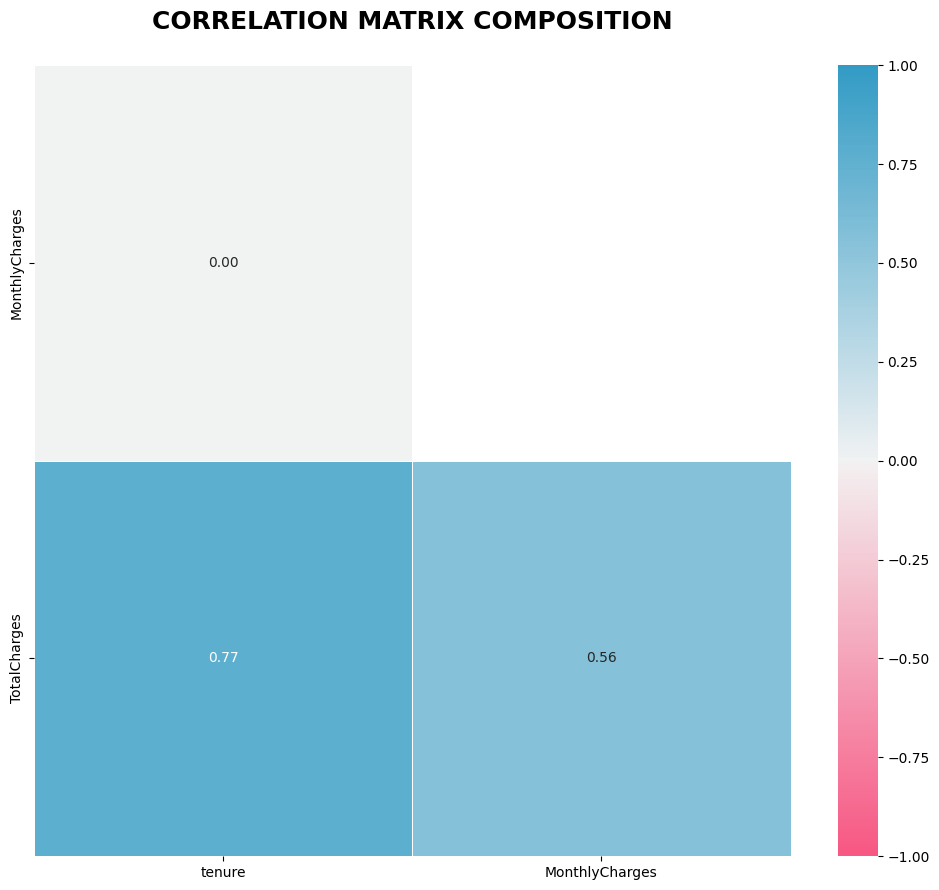

In [97]:
corr_matrix = df.corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="center", fontsize=18, weight="bold");
plt.tight_layout()
plt.show()

#### Insights from Correlation Analysis of Numerical Features

* **Tenure vs TotalCharges (0.77)** → **Strong positive correlation**. Customers with longer tenure naturally accumulate higher total charges, reflecting billing consistency over time.

* **MonthlyCharges vs TotalCharges (0.56)** → **Moderate positive correlation**. Customers paying higher monthly charges also tend to have higher total charges, although tenure still plays a stronger role.

* **Tenure vs MonthlyCharges (0.00)** → **No correlation**. Length of stay does not influence the monthly charge — monthly cost is more dependent on selected service packages rather than customer loyalty duration.

**Summary:**

* The dataset shows a **clear dependency of TotalCharges** on both tenure and monthly charges, with tenure being the stronger driver.
* **MonthlyCharges and tenure are independent**, so they contribute distinct information to the modeling process.
* Multicollinearity risk is **low**, except for TotalCharges being partially redundant (as it is derived from tenure × monthly charges). For modeling, one might consider dropping `TotalCharges` or carefully evaluating feature importance to avoid redundancy.

## Bivariate Analysis

,Churn,Count,Mean,Median,Std
1,Yes,2898,70.595114,70.525000,28.653156
0,No,2982,69.732763,69.730000,28.949522


🔎 D’Agostino and Pearson Normality Test for 'MonthlyCharges' across 'Churn' groups

 Group: No (n = 2982)
  Statistic : 2542.585
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Yes (n = 2898)
  Statistic : 2184.066
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'MonthlyCharges' by 'Churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 4246681.0
p-value     : 0.25398594816633036

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


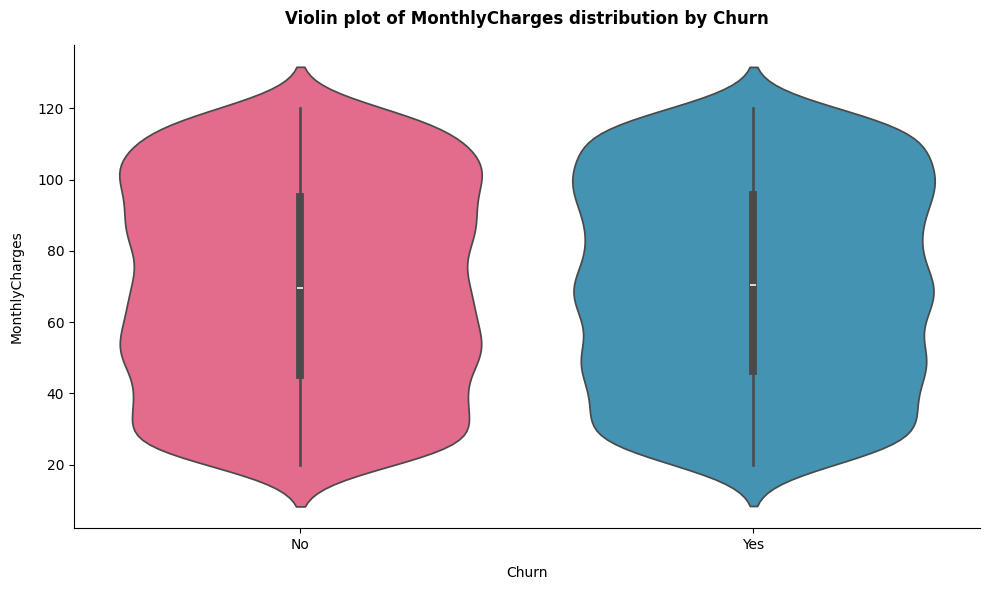

,Churn,Count,Mean,Median,Std
1,Yes,2898,2594.447060,2177.830000,1903.337035
0,No,2982,2539.957689,2098.125000,1916.425264


🔎 D’Agostino and Pearson Normality Test for 'TotalCharges' across 'Churn' groups

 Group: No (n = 2982)
  Statistic : 274.170
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Yes (n = 2898)
  Statistic : 240.214
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'TotalCharges' by 'Churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 4229172.0
p-value     : 0.1586090160347703

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


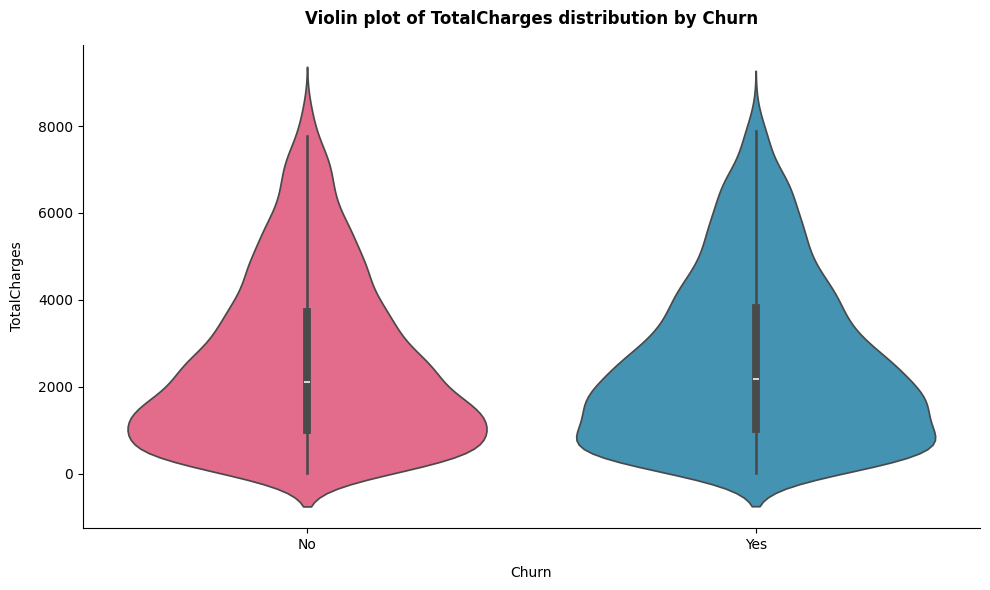

,Churn,Count,Mean,Median,Std
1,Yes,2898,36.731539,37.000000,20.855149
0,No,2982,36.371898,36.000000,20.964504


🔎 D’Agostino and Pearson Normality Test for 'tenure' across 'Churn' groups

 Group: No (n = 2982)
  Statistic : 3591.076
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Yes (n = 2898)
  Statistic : 3234.050
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'tenure' by 'Churn'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 4277941.5
p-value     : 0.5089736355070217

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


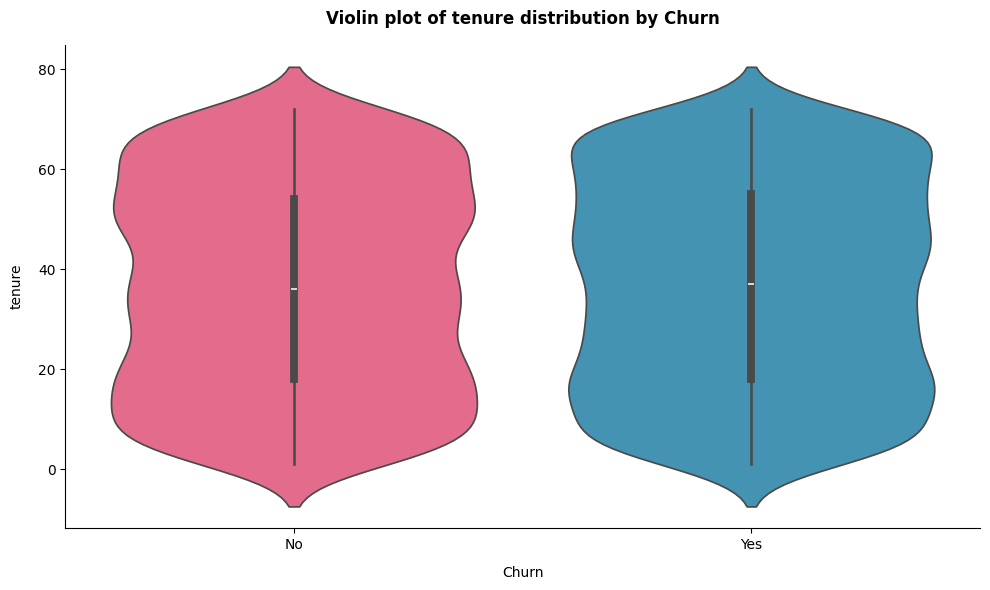

In [98]:
from IPython.core.display import HTML
target_feature = "Churn"

def perform_statical_testing(feature, df=df, total_categories=2, target_feature=target_feature):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    total_categories = df[target_feature].nunique()
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        perform_kruskal_test(df=df, categorical_feature=target_feature, numeric_feature=feature)

def plot_numerical_distribution_by_target_feature(feature, df = df, target_feature = target_feature):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by {target_feature}</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    plot_numerical_distribution_by_target_feature(feature=feature)

### Insight Numerical Features by Churn

`MonthlyCharges`

* `MonthlyCharges` shows **no statistically significant difference** between churned and active customers (p-value ≈ 0.25).
* This indicates that **MonthlyCharges does not have a strong direct correlation with churn**.

`TotalCharges`

* `TotalCharges` shows **no meaningful statistical difference** between churned and active customers.
* This indicates that **accumulated spending is not a direct driver of churn**.

`tenure`

* `Tenure` shows **no meaningful statistical difference** between churned and retained customers.
* This contrasts with the common assumption that newer customers are more likely to churn.

In [99]:
cat_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                "Contract", "PaperlessBilling", "PaymentMethod"]
df.drop(columns="customerID", axis=1, inplace=True)

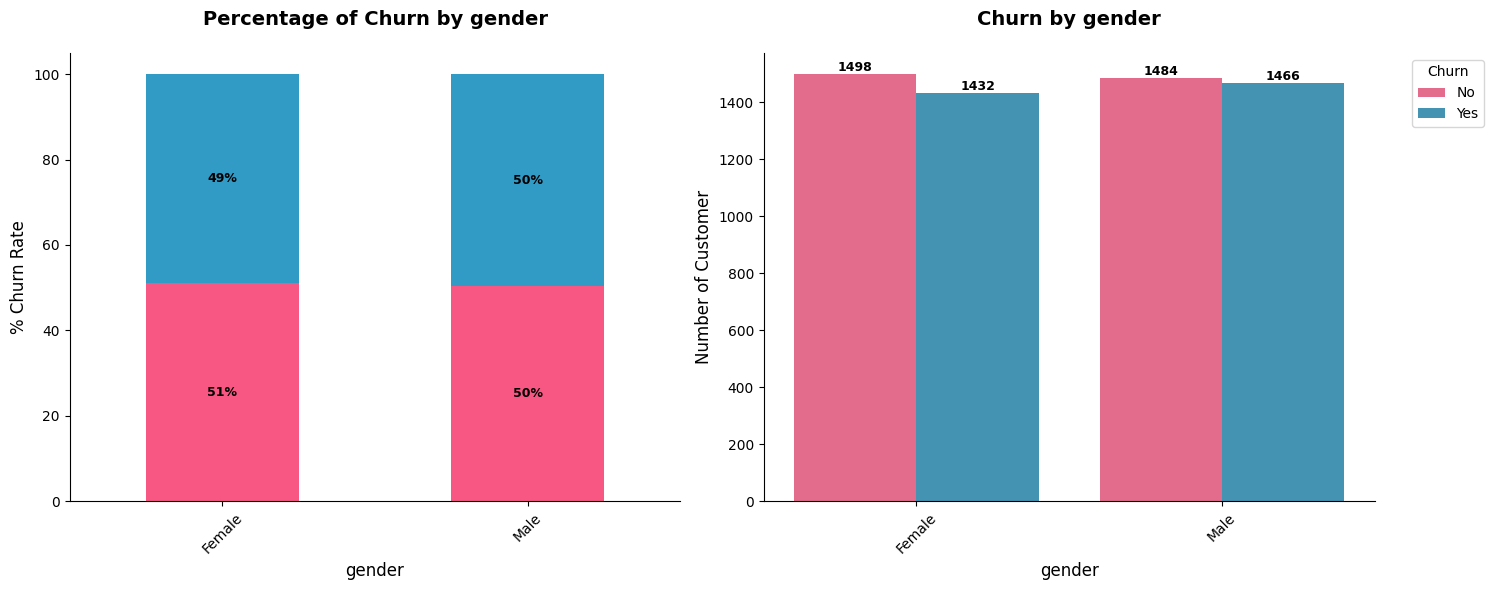


🔍 Chi-Square Test of Independence: 'gender' vs. 'Churn'
Chi-squared statistic: 0.364
Degrees of freedom: 1
p-value: 0.546058
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'gender' and 'Churn'.

Standardized Residuals:
Churn     No   Yes
gender            
Female  0.31 -0.32
Male   -0.31  0.32


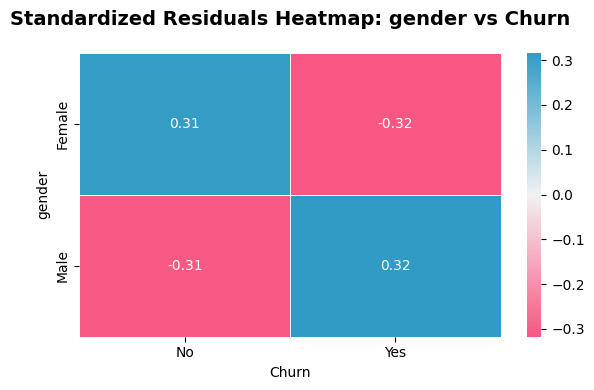

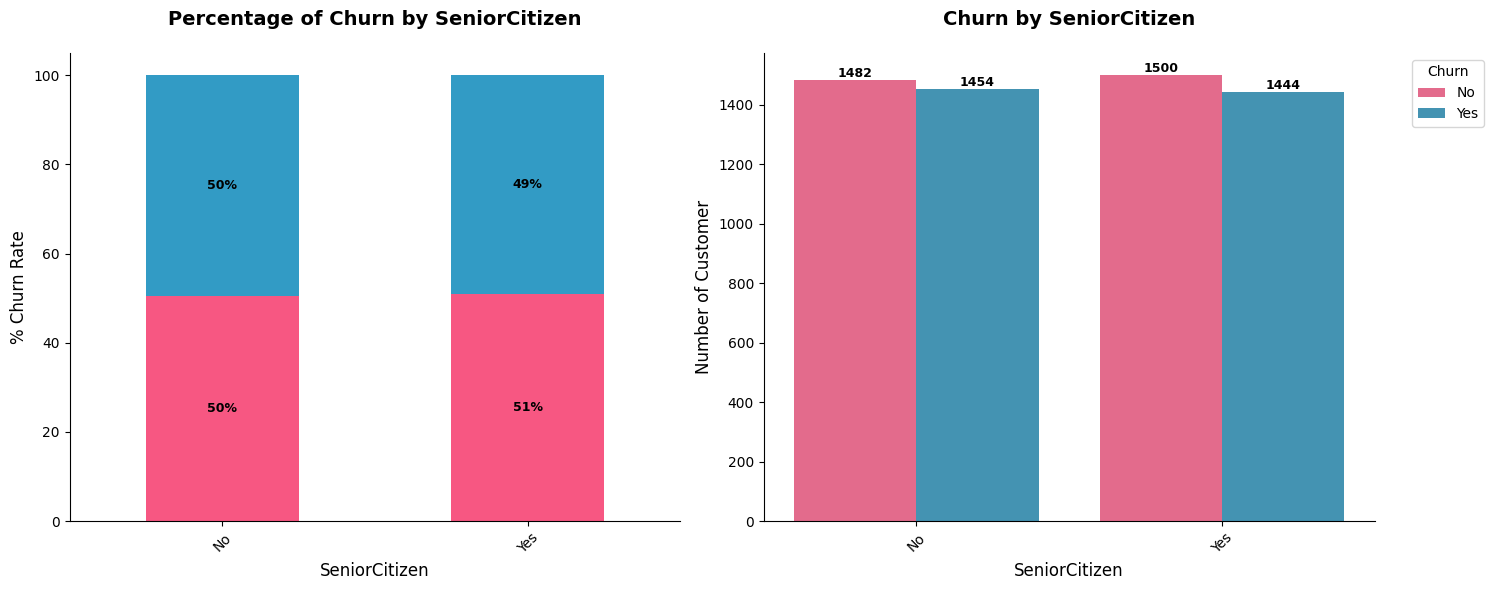


🔍 Chi-Square Test of Independence: 'SeniorCitizen' vs. 'Churn'
Chi-squared statistic: 0.114
Degrees of freedom: 1
p-value: 0.735657
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'SeniorCitizen' and 'Churn'.

Standardized Residuals:
Churn            No   Yes
SeniorCitizen            
No            -0.18  0.18
Yes            0.18 -0.18


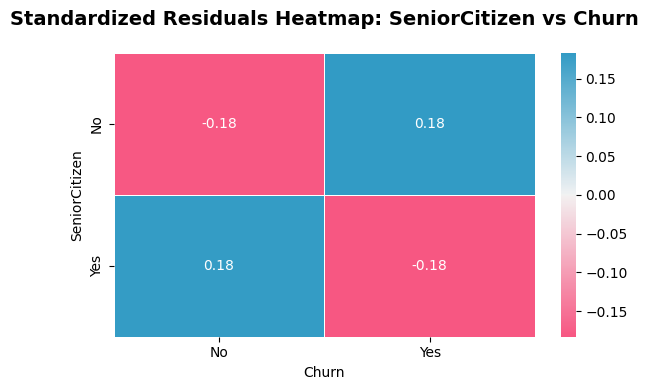

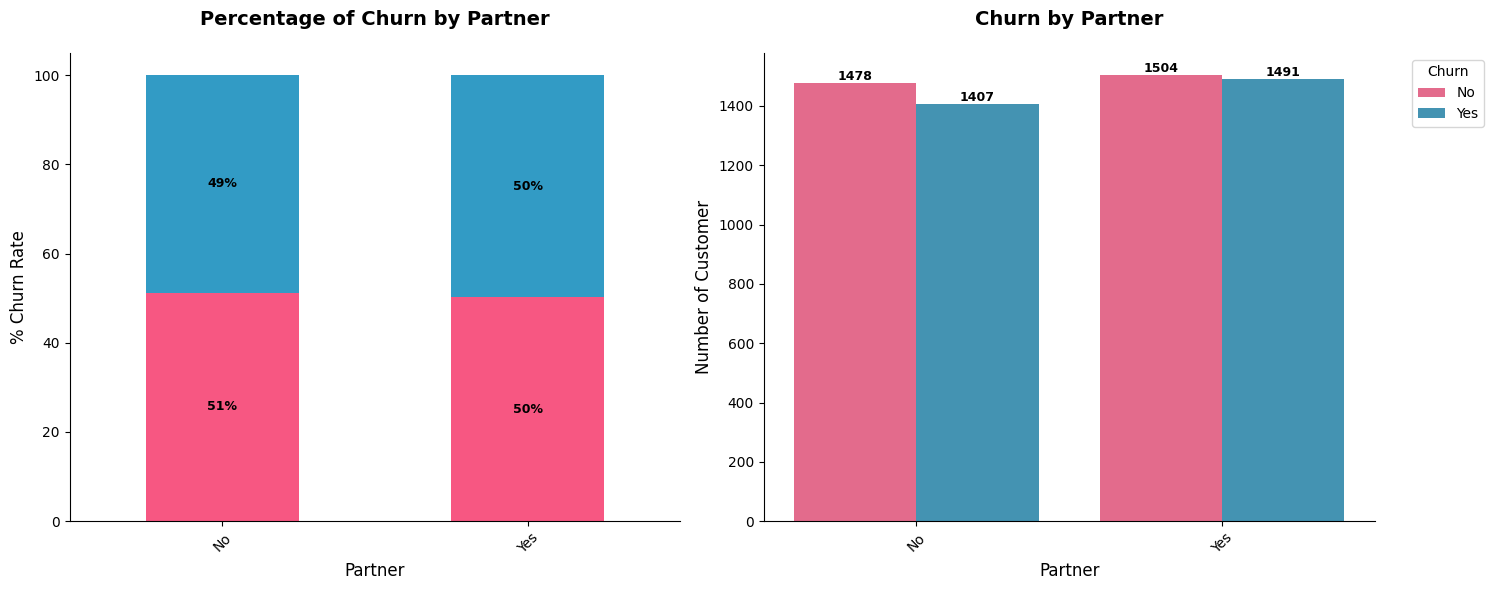


🔍 Chi-Square Test of Independence: 'Partner' vs. 'Churn'
Chi-squared statistic: 0.564
Degrees of freedom: 1
p-value: 0.452654
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Partner' and 'Churn'.

Standardized Residuals:
Churn      No   Yes
Partner            
No       0.39 -0.39
Yes     -0.38  0.39


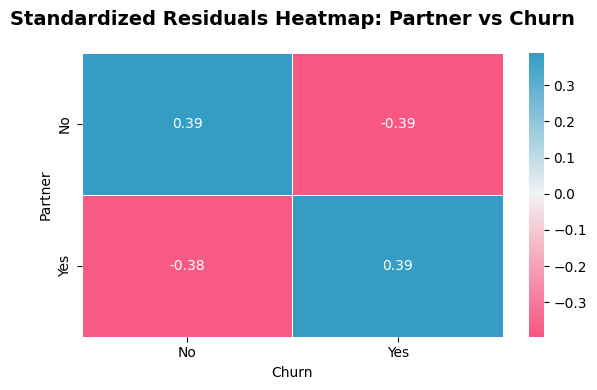

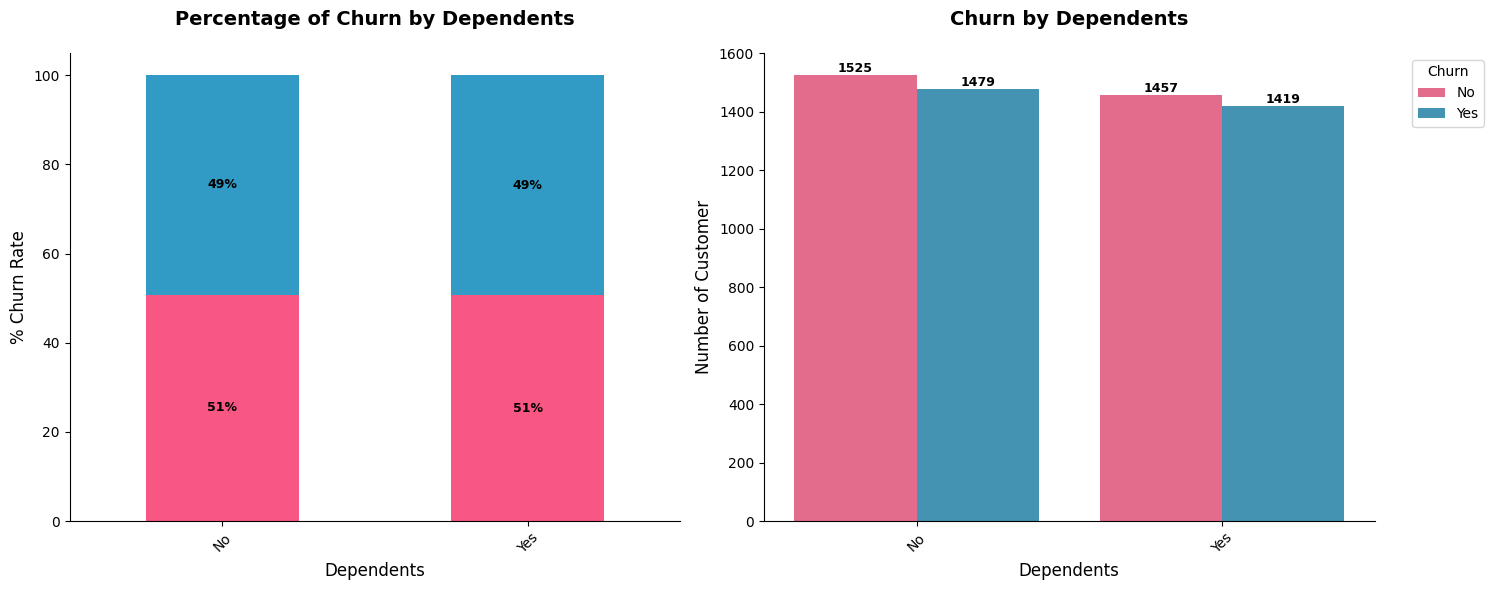


🔍 Chi-Square Test of Independence: 'Dependents' vs. 'Churn'
Chi-squared statistic: 0.003
Degrees of freedom: 1
p-value: 0.956602
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Dependents' and 'Churn'.

Standardized Residuals:
Churn         No   Yes
Dependents            
No          0.04 -0.04
Yes        -0.04  0.04


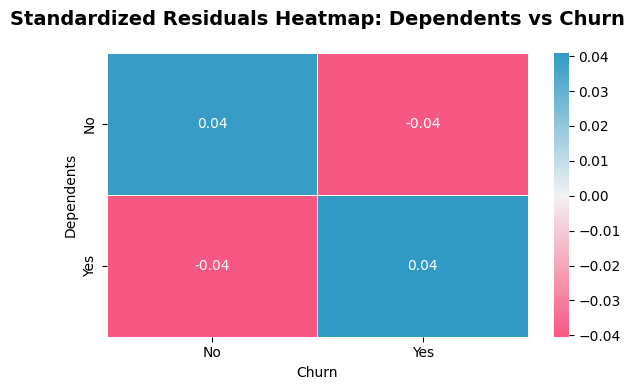

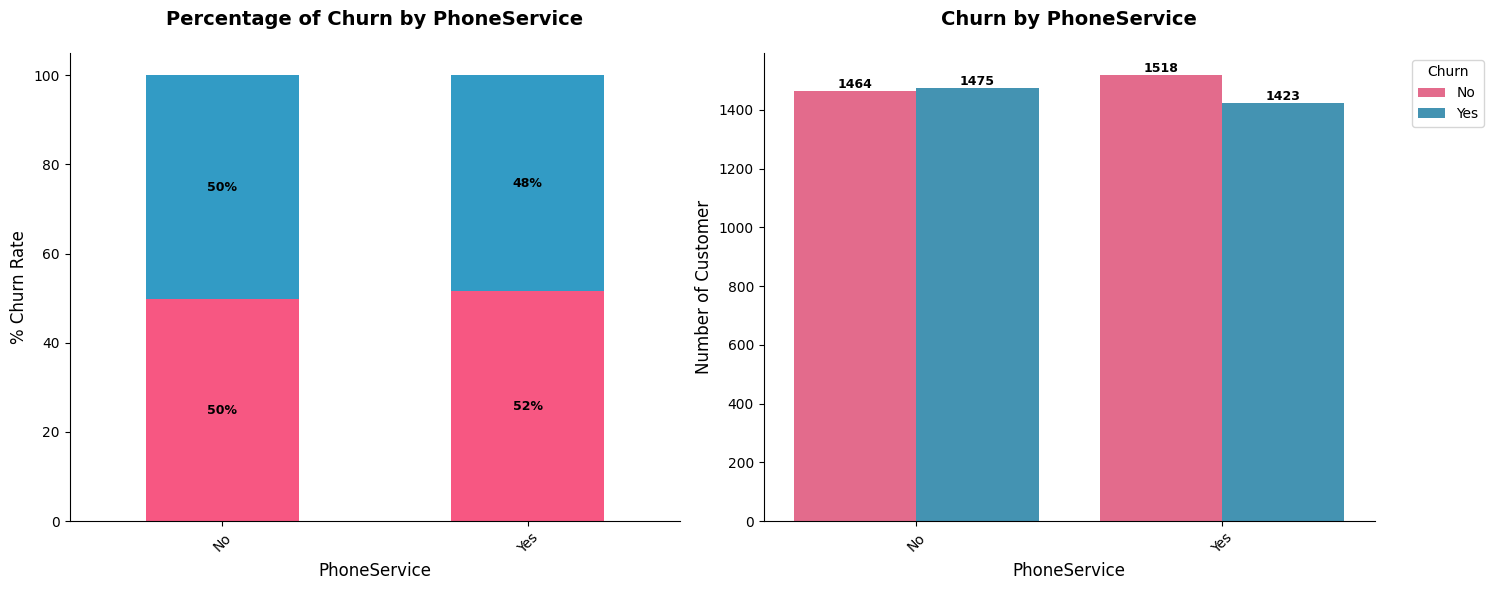


🔍 Chi-Square Test of Independence: 'PhoneService' vs. 'Churn'
Chi-squared statistic: 1.839
Degrees of freedom: 1
p-value: 0.175089
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'PhoneService' and 'Churn'.

Standardized Residuals:
Churn           No  Yes
PhoneService           
No           -0.69  0.7
Yes           0.69 -0.7


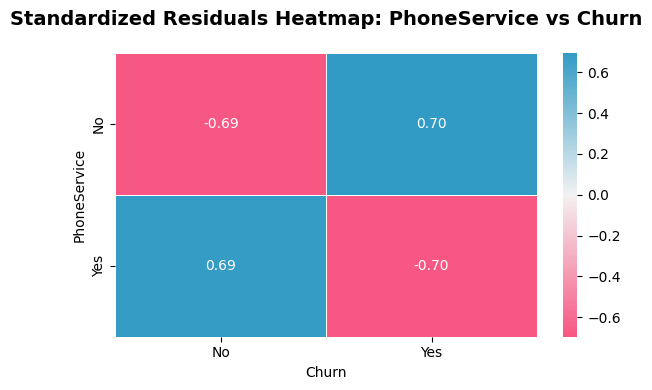

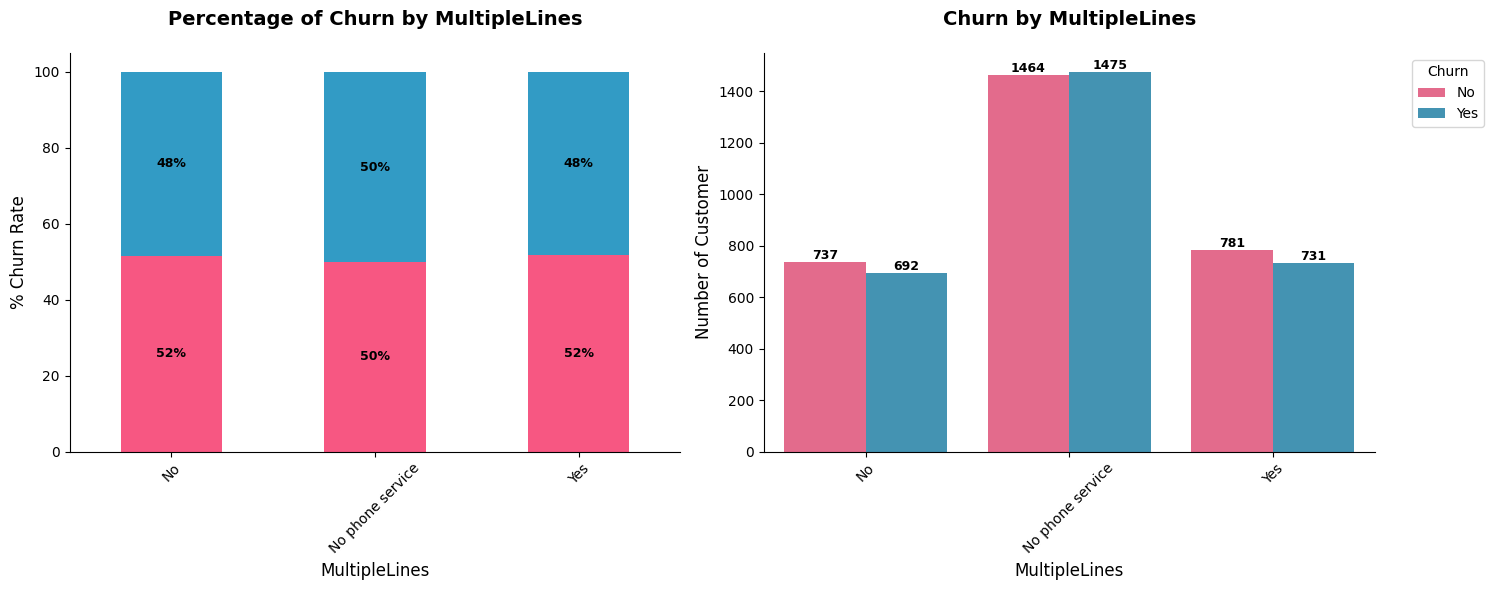


🔍 Chi-Square Test of Independence: 'MultipleLines' vs. 'Churn'
Chi-squared statistic: 1.912
Degrees of freedom: 2
p-value: 0.384413
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'MultipleLines' and 'Churn'.

Standardized Residuals:
Churn               No   Yes
MultipleLines               
No                0.46 -0.46
No phone service -0.69  0.70
Yes               0.51 -0.52


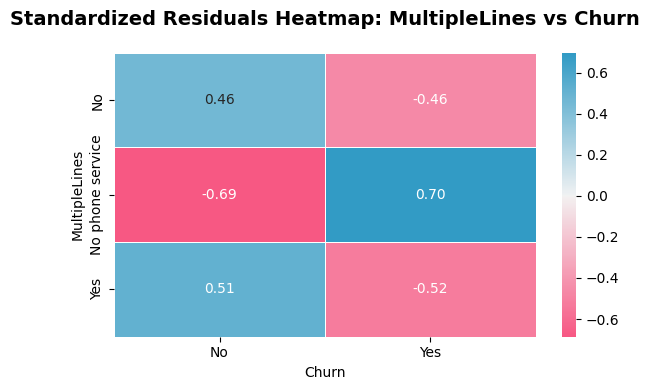

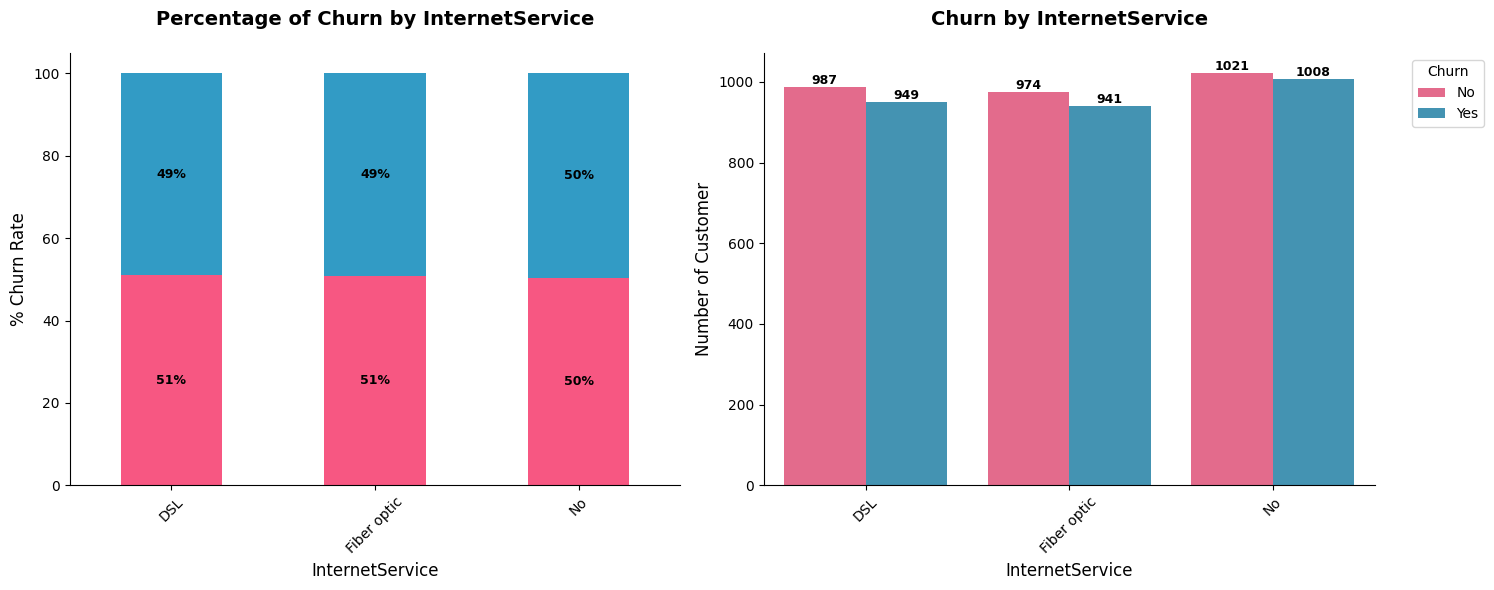


🔍 Chi-Square Test of Independence: 'InternetService' vs. 'Churn'
Chi-squared statistic: 0.198
Degrees of freedom: 2
p-value: 0.905802
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'InternetService' and 'Churn'.

Standardized Residuals:
Churn              No   Yes
InternetService            
DSL              0.17 -0.17
Fiber optic      0.09 -0.09
No              -0.25  0.25


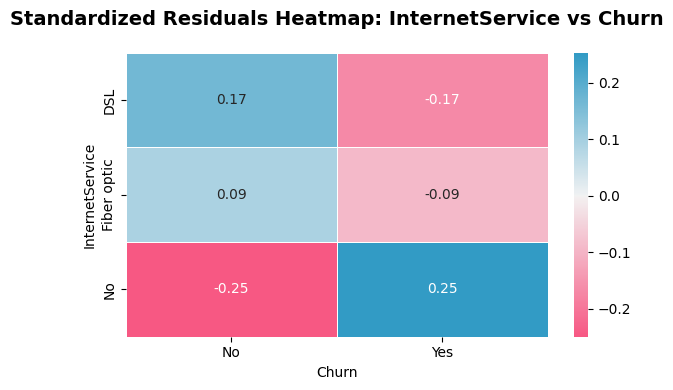

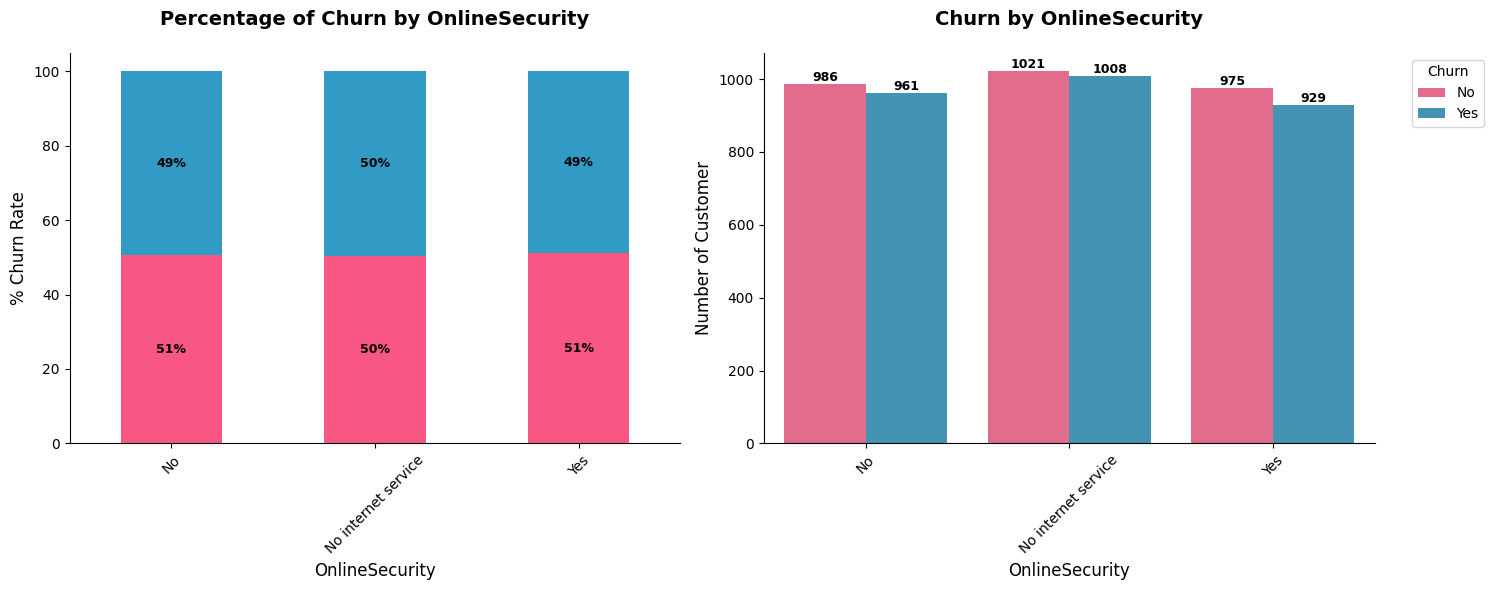


🔍 Chi-Square Test of Independence: 'OnlineSecurity' vs. 'Churn'
Chi-squared statistic: 0.316
Degrees of freedom: 2
p-value: 0.853974
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'OnlineSecurity' and 'Churn'.

Standardized Residuals:
Churn                  No   Yes
OnlineSecurity                 
No                  -0.04  0.05
No internet service -0.25  0.25
Yes                  0.30 -0.31


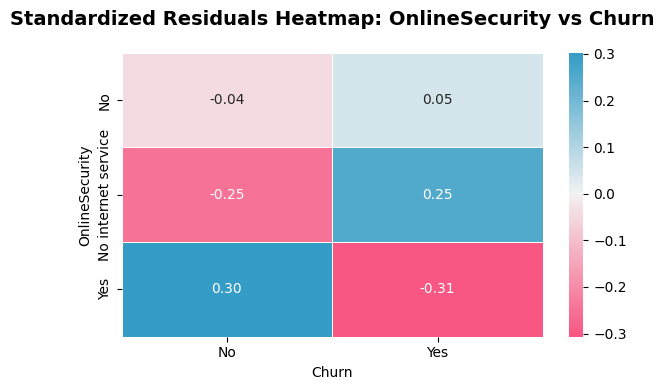

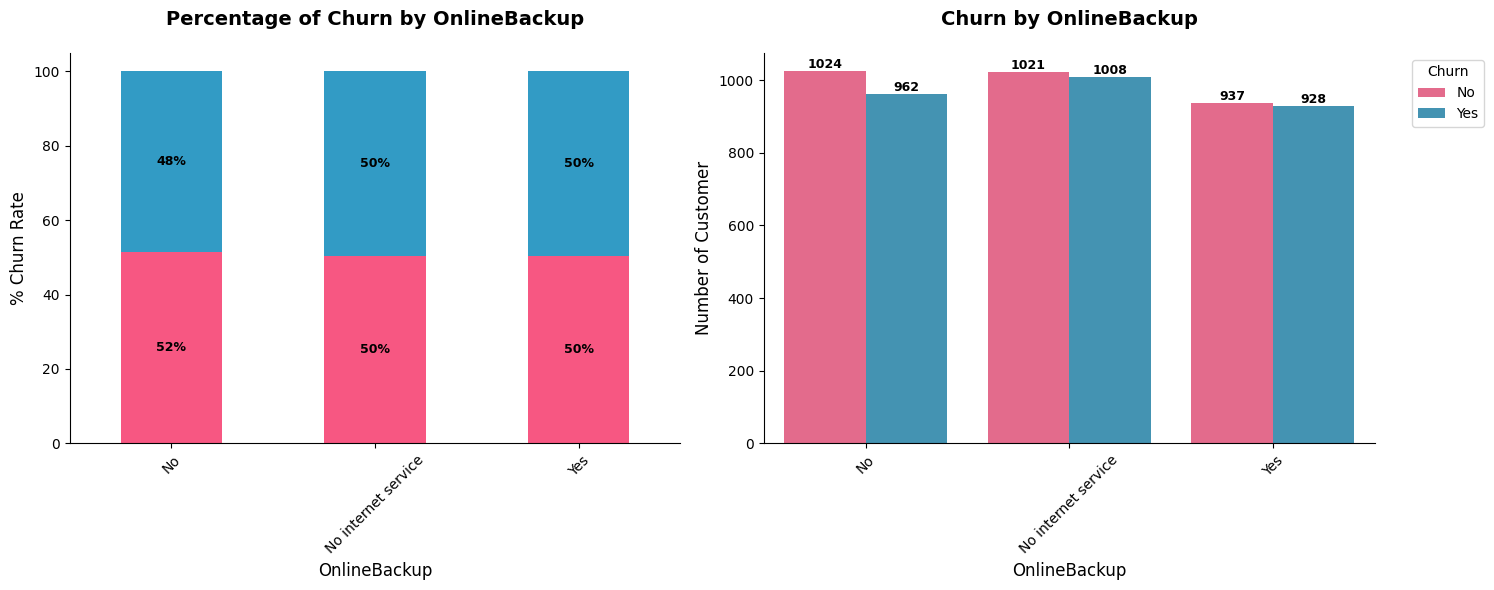


🔍 Chi-Square Test of Independence: 'OnlineBackup' vs. 'Churn'
Chi-squared statistic: 0.862
Degrees of freedom: 2
p-value: 0.649713
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'OnlineBackup' and 'Churn'.

Standardized Residuals:
Churn                  No   Yes
OnlineBackup                   
No                   0.53 -0.54
No internet service -0.25  0.25
Yes                 -0.29  0.29


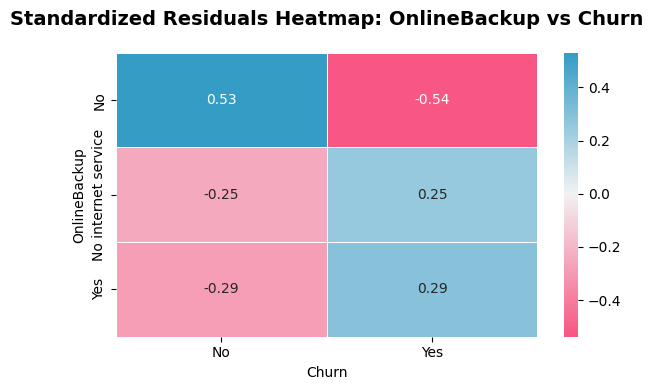

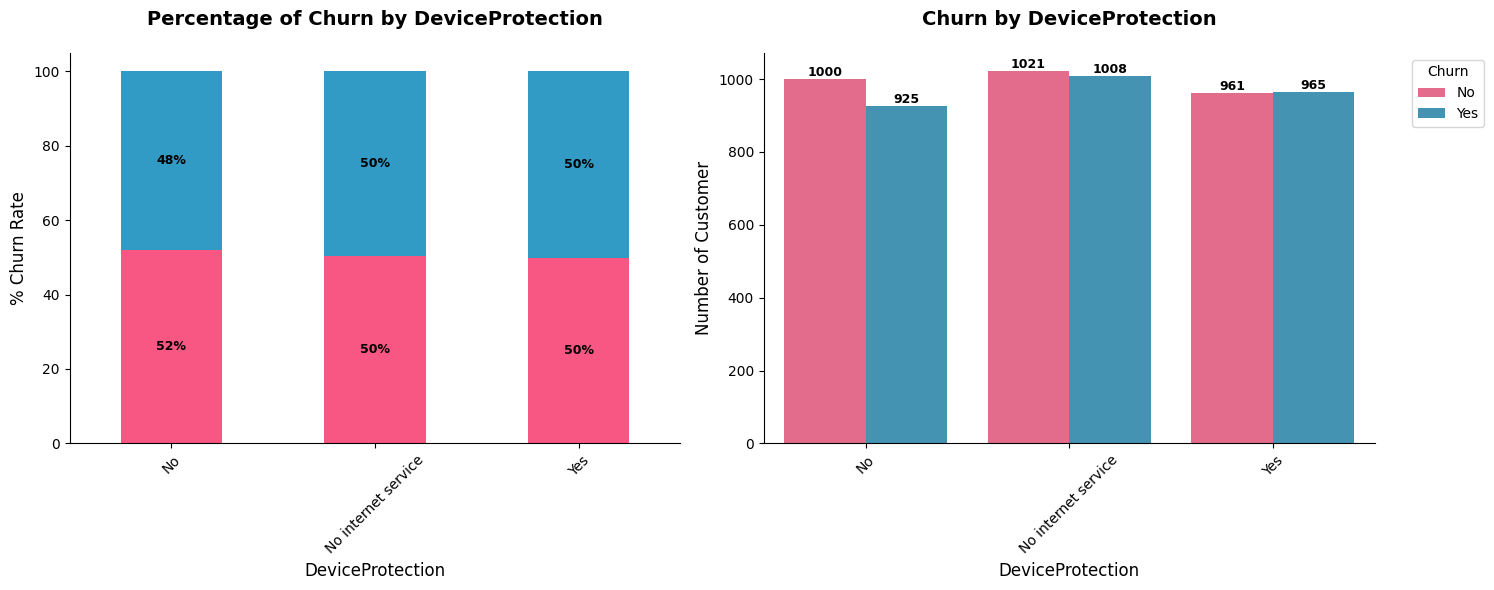


🔍 Chi-Square Test of Independence: 'DeviceProtection' vs. 'Churn'
Chi-squared statistic: 1.814
Degrees of freedom: 2
p-value: 0.403724
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'DeviceProtection' and 'Churn'.

Standardized Residuals:
Churn                  No   Yes
DeviceProtection               
No                   0.76 -0.77
No internet service -0.25  0.25
Yes                 -0.50  0.51


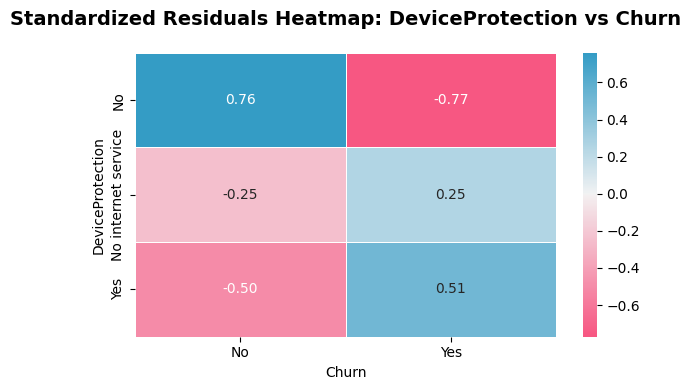

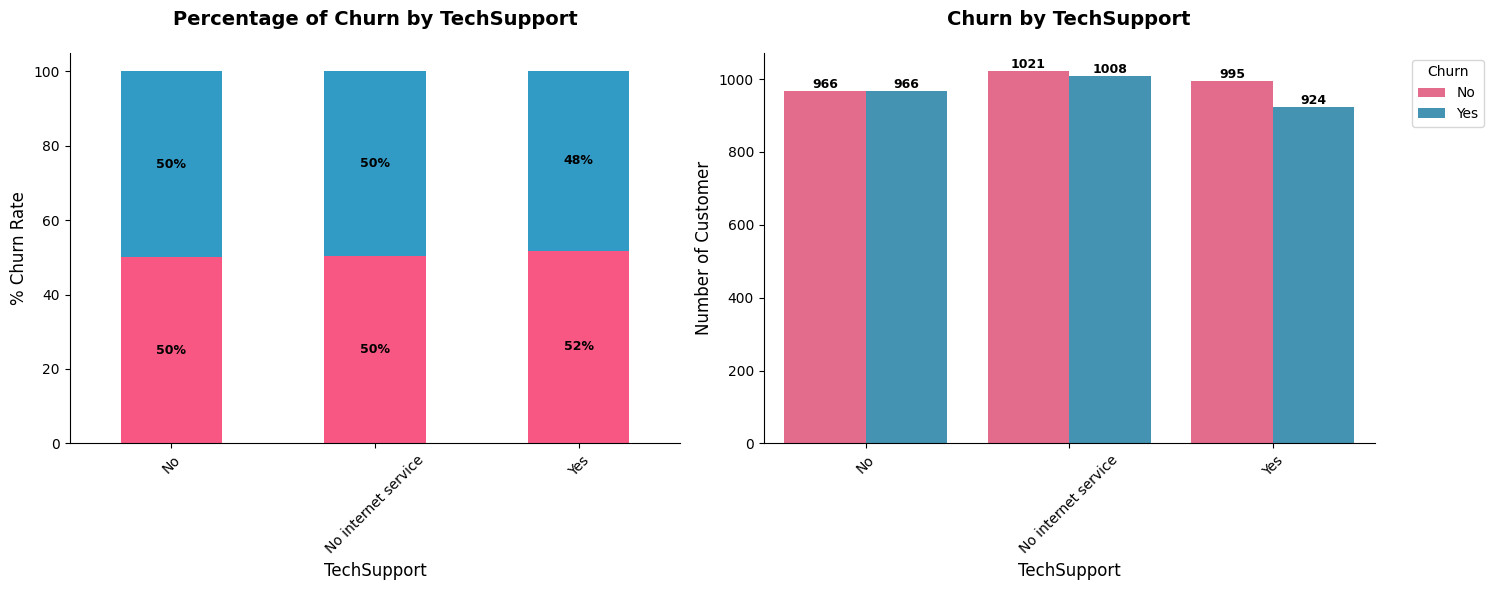


🔍 Chi-Square Test of Independence: 'TechSupport' vs. 'Churn'
Chi-squared statistic: 1.510
Degrees of freedom: 2
p-value: 0.469896
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'TechSupport' and 'Churn'.

Standardized Residuals:
Churn                  No   Yes
TechSupport                    
No                  -0.44  0.45
No internet service -0.25  0.25
Yes                  0.70 -0.71


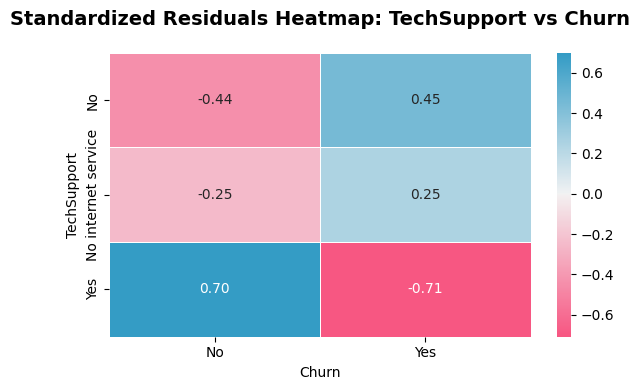

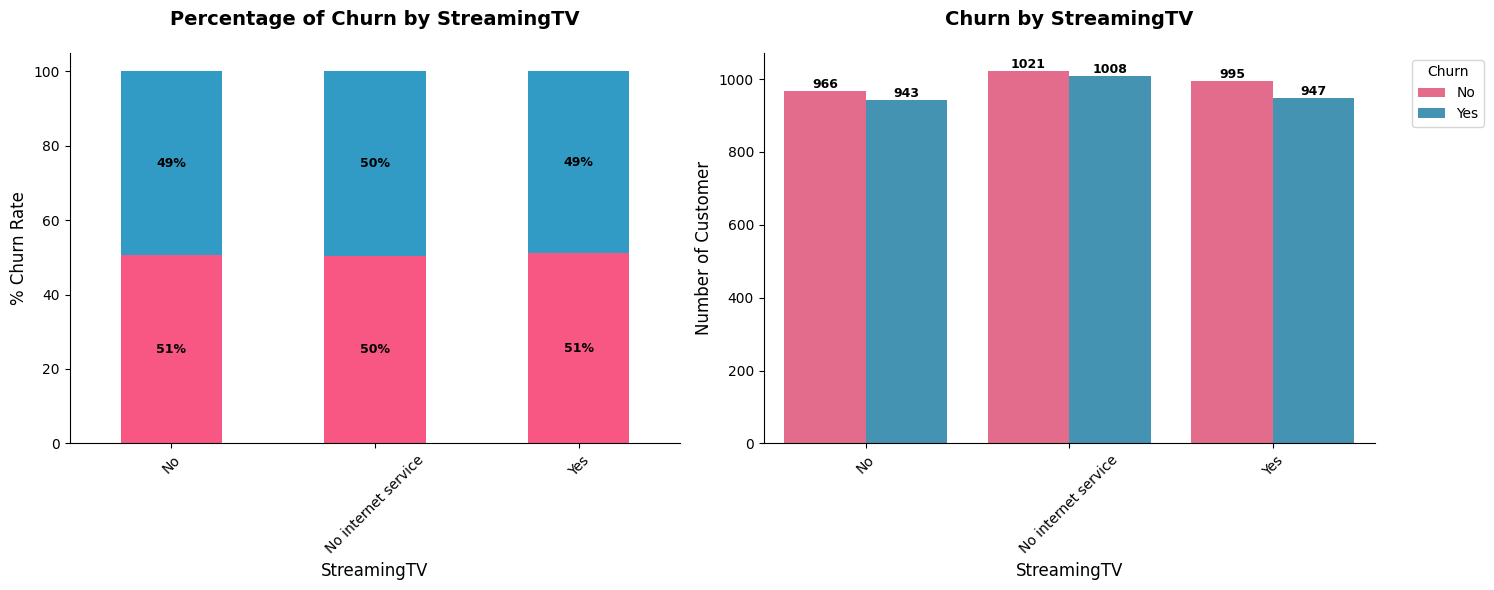


🔍 Chi-Square Test of Independence: 'StreamingTV' vs. 'Churn'
Chi-squared statistic: 0.347
Degrees of freedom: 2
p-value: 0.840769
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'StreamingTV' and 'Churn'.

Standardized Residuals:
Churn                  No   Yes
StreamingTV                    
No                  -0.07  0.07
No internet service -0.25  0.25
Yes                  0.32 -0.33


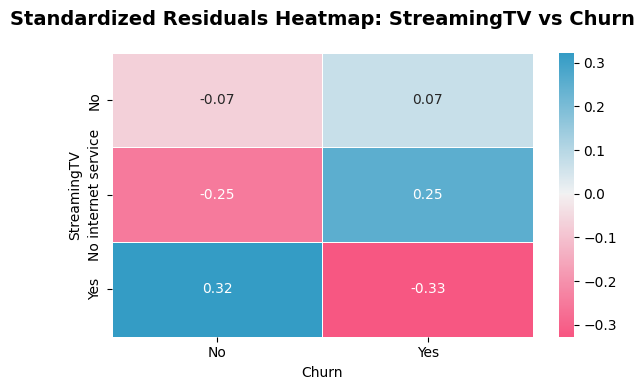

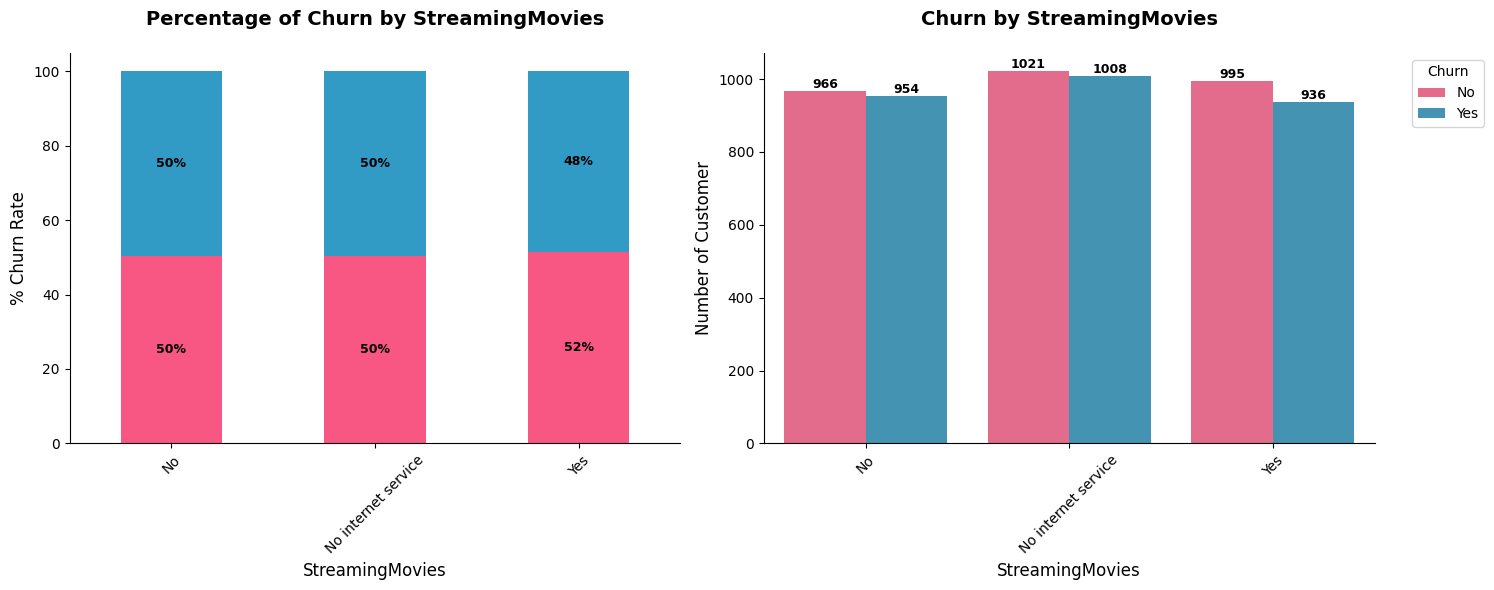


🔍 Chi-Square Test of Independence: 'StreamingMovies' vs. 'Churn'
Chi-squared statistic: 0.761
Degrees of freedom: 2
p-value: 0.683472
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'StreamingMovies' and 'Churn'.

Standardized Residuals:
Churn                  No   Yes
StreamingMovies                
No                  -0.25  0.25
No internet service -0.25  0.25
Yes                  0.50 -0.51


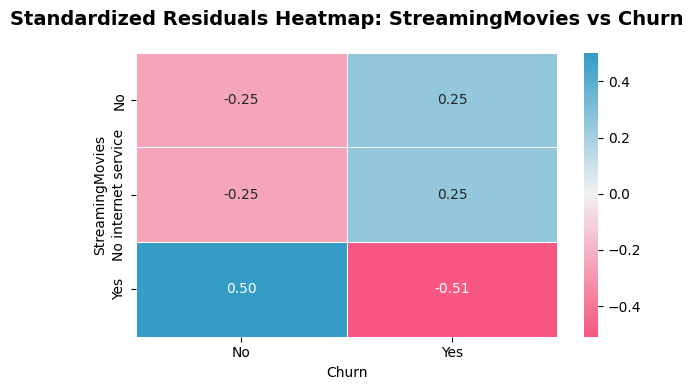

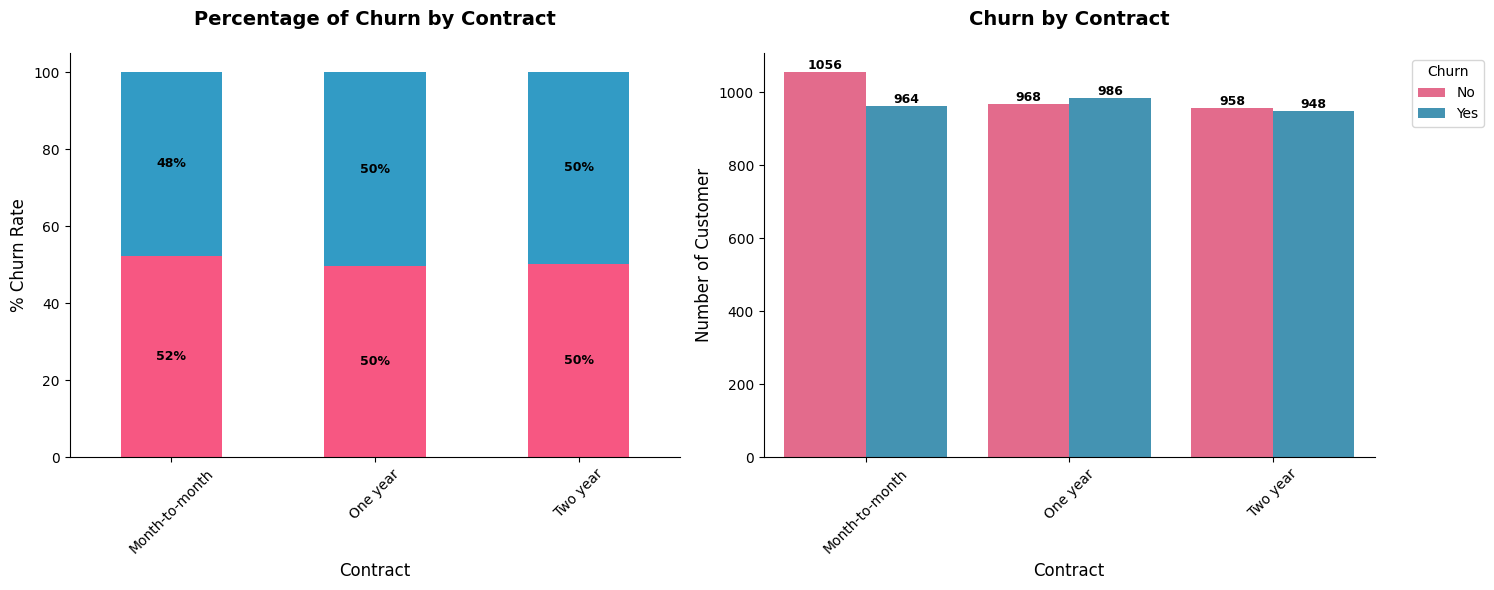


🔍 Chi-Square Test of Independence: 'Contract' vs. 'Churn'
Chi-squared statistic: 3.209
Degrees of freedom: 2
p-value: 0.200987
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Contract' and 'Churn'.

Standardized Residuals:
Churn             No   Yes
Contract                  
Month-to-month  0.99 -1.00
One year       -0.73  0.74
Two year       -0.28  0.28


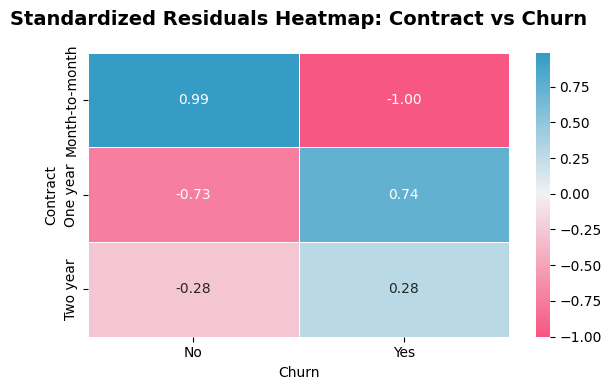

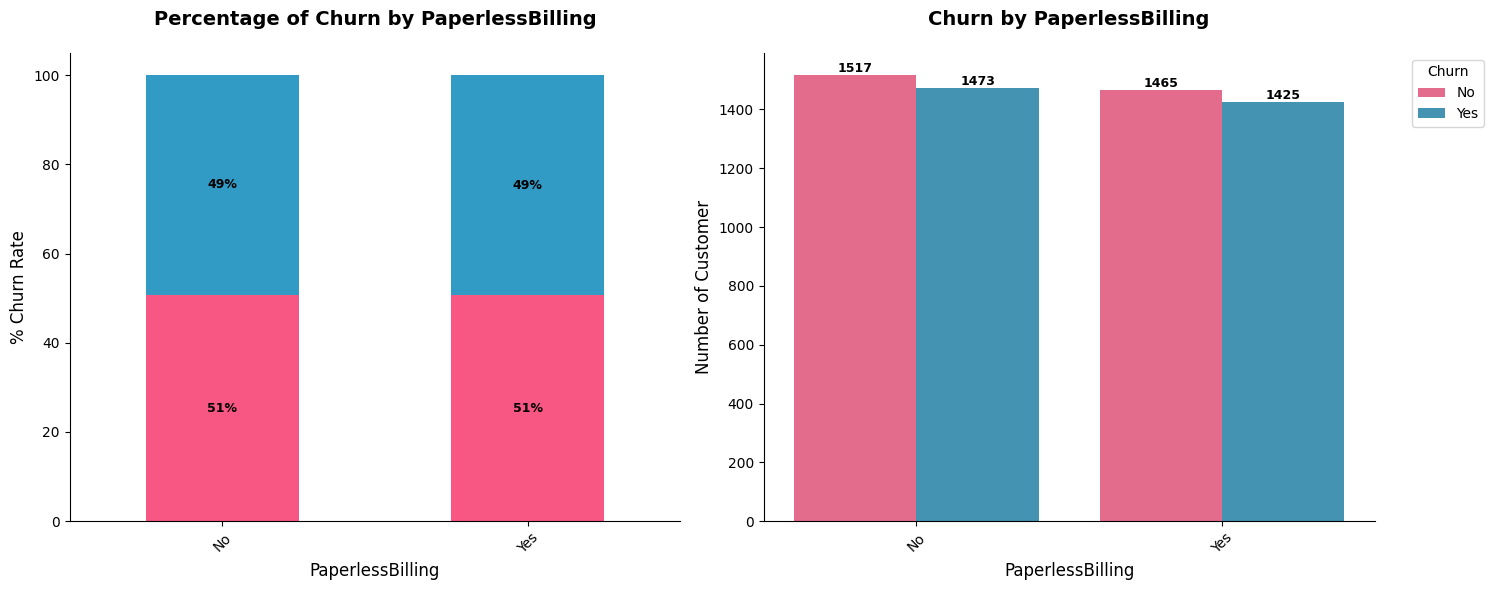


🔍 Chi-Square Test of Independence: 'PaperlessBilling' vs. 'Churn'
Chi-squared statistic: 0.000
Degrees of freedom: 1
p-value: 0.994053
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'PaperlessBilling' and 'Churn'.

Standardized Residuals:
Churn               No   Yes
PaperlessBilling            
No                0.02 -0.02
Yes              -0.02  0.02


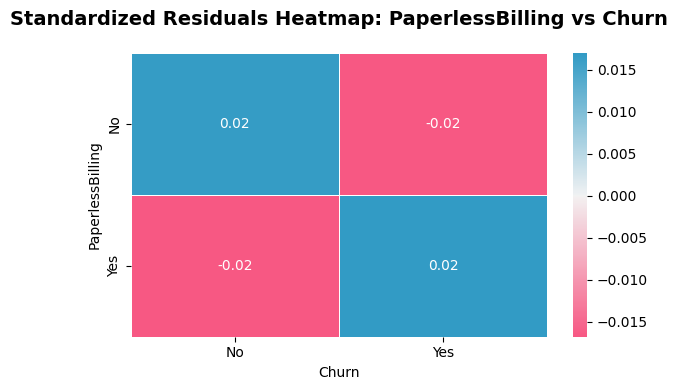

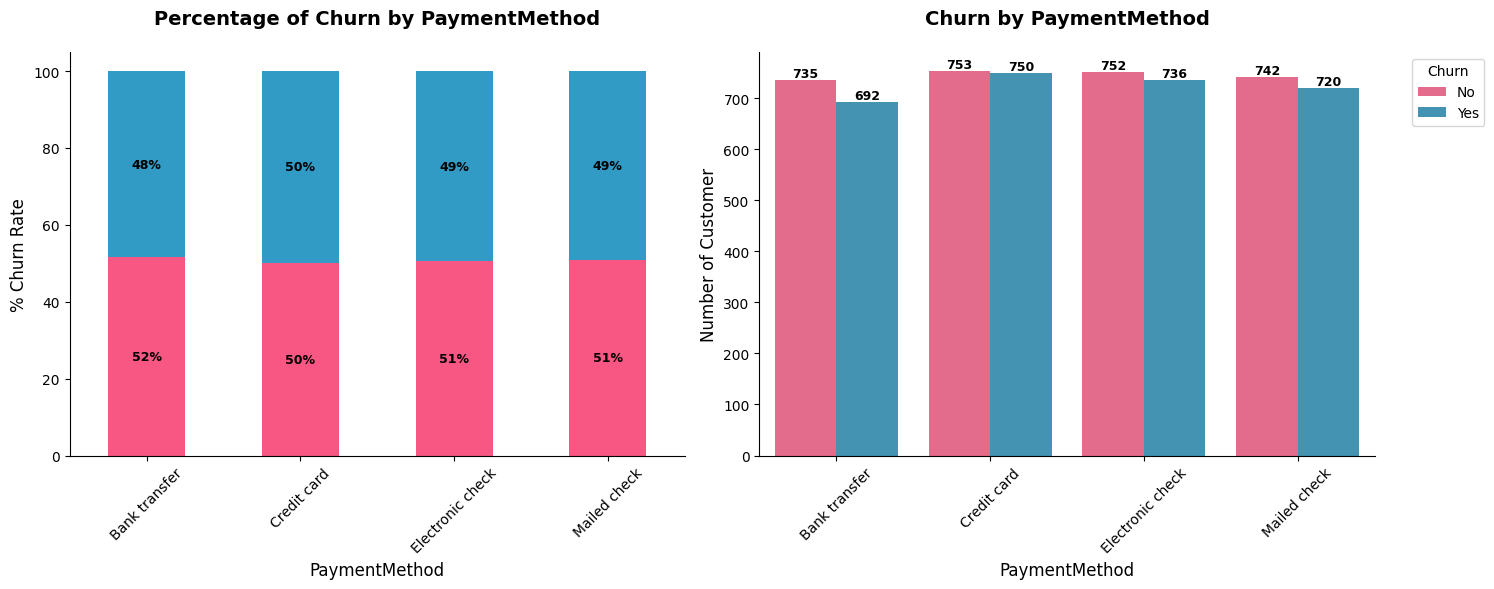


🔍 Chi-Square Test of Independence: 'PaymentMethod' vs. 'Churn'
Chi-squared statistic: 0.605
Degrees of freedom: 3
p-value: 0.895302
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'PaymentMethod' and 'Churn'.

Standardized Residuals:
Churn               No   Yes
PaymentMethod               
Bank transfer     0.42 -0.43
Credit card      -0.33  0.34
Electronic check -0.10  0.10
Mailed check      0.02 -0.02


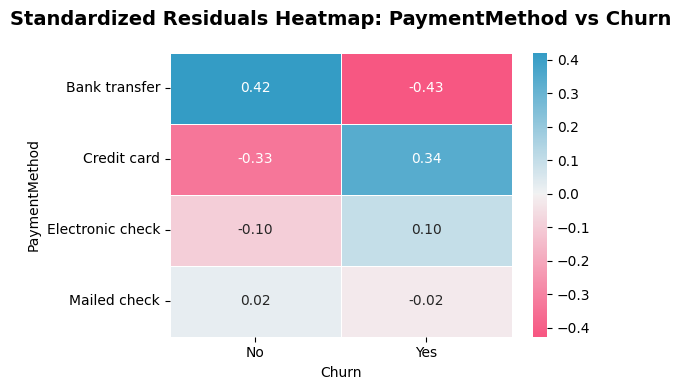

In [100]:
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Churn</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Churn
    grouped = df.groupby([cat, "Churn"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
    
    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.0f%%', label_type="center", weight="bold", fontsize=9)

    ax[0].set_title(f"Percentage of Churn by {cat}", fontsize=14, weight="bold", pad=20)
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Churn Rate", fontsize=12)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rot)
    ax[0].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Churn", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=percentages.index)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=9, weight="bold")

    ax[1].set_title(f"Churn by {cat}", fontsize=14, weight="bold", pad=20)
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=rot)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Churn", df=df, show_residuals=True)

for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df, rot=45)

### Insight for Categorical Features by Churn

`gender`

* There is **no statistical evidence** supporting a relationship between gender and churn (Chi-square test p-value ≈ 0.55).
* From a business perspective: churn rates are almost identical — **49% for females vs. 50% for males** — showing that gender does not drive churn behavior.
* The distribution is nearly balanced, and standardized residuals confirm **no meaningful deviations** across male and female groups.
* Therefore, **gender is not a useful predictor** for churn modeling. Business strategies to reduce churn should **not prioritize gender segmentation**, but instead focus on other factors such as **contract type, payment method, or service add-ons**.

`SeniorCitizen`

* There is **no statistical evidence** of a relationship between senior citizen status and churn (Chi-square test p-value ≈ 0.74).
* From a business perspective: churn rates are nearly identical — **50% for non-seniors vs. 51% for seniors** — showing that age group does not significantly drive churn.
* The distribution is well balanced, and standardized residuals confirm **no meaningful deviations** between seniors and non-seniors.
* Therefore, **SeniorCitizen is not a strong predictor** for churn modeling. Retention strategies should focus more on **contract type, payment method, or service-related features**, rather than age segmentation.

`Partner`

* There is **no statistical evidence** of a relationship between partner status and churn (Chi-square test p-value ≈ 0.45).
* From a business perspective: churn rates are nearly identical — **49% for customers without a partner vs. 50% for customers with a partner**.
* Standardized residuals confirm **no meaningful deviations** across groups.
* Therefore, **partner status is not a useful predictor** for churn. Retention strategies should instead focus on **contract type, payment method, and service usage** rather than household/relationship status.

`Dependents`

* There is **no statistical evidence** of a relationship between having dependents and churn (Chi-square test p-value ≈ 0.96).
* From a business perspective: churn rates are virtually identical — **49% for customers without dependents vs. 49% for customers with dependents**.
* Standardized residuals are very close to zero, confirming **no meaningful deviations** across groups.
* Therefore, **dependents is not a useful predictor** for churn. Retention efforts should instead emphasize **contract terms, payment methods, and service features**, which are more impactful drivers of churn.

`PhoneService`

* There is **no statistical evidence** of a relationship between phone service subscription and churn (Chi-square test p-value ≈ 0.18).
* From a business perspective: churn rates are nearly identical — **50% for customers without phone service vs. 52% for customers with phone service**.
* Standardized residuals confirm **no meaningful deviations**, with both groups showing very similar churn behaviors.
* Therefore, **PhoneService is not a useful predictor** for churn. Retention strategies should focus more on **internet-related services, contract type, or billing methods**, which are more influential drivers of churn.

`MultipleLines`

* There is **no statistical evidence** of a relationship between multiple line subscription and churn (Chi-square test p-value ≈ 0.38).
* From a business perspective: churn rates are very similar — **52% for customers without multiple lines vs. 48–50% for those with multiple lines or no phone service**.
* Standardized residuals show only small deviations, confirming **no meaningful association** between multiple line usage and churn.
* Therefore, **MultipleLines is not a strong predictor** for churn. Business strategies should instead prioritize **contract type, internet services, and billing methods**, which have stronger influence on churn behavior.

`InternetService`

* There is **no statistical evidence** of a relationship between type of internet service and churn (Chi-square test p-value ≈ 0.91).
* From a business perspective: churn rates are almost identical — **49% for DSL, 49% for Fiber optic, and 50% for customers without internet service**.
* Standardized residuals are small (all < |0.3|), confirming **no meaningful deviations** across groups.
* Therefore, **InternetService type is not a strong predictor** for churn. Retention efforts should shift toward **contract length, payment method, and value-added services**, which are more influential in customer retention.

`OnlineSecurity`

* There is **no statistical evidence** of a relationship between online security service and churn (Chi-square test p-value ≈ 0.85).
* From a business perspective: churn rates are nearly identical — **49–51% across all groups** (with service, without service, and no internet).
* Standardized residuals are small (|value| ≤ 0.31), confirming **no meaningful deviations** between groups.
* Therefore, **OnlineSecurity is not a strong predictor** for churn. Retention strategies should instead emphasize **contract type, billing method, and bundled services**, which are likely to have a stronger impact on churn behavior.

`OnlineBackup`

* There is **no statistical evidence** of a relationship between online backup service and churn (Chi-square test p-value ≈ 0.65).
* From a business perspective: churn rates are very similar — **48–52% across all groups** (with service, without service, or no internet).
* Standardized residuals show small deviations (max ≈ |0.54|), confirming **no meaningful association** between backup service usage and churn.
* Therefore, **OnlineBackup is not a reliable predictor** for churn. Companies should focus on **contract structure, pricing, and bundled value-added services** instead of backup subscription alone when addressing churn risks.

`DeviceProtection`

* There is **no statistical evidence** of a relationship between device protection service and churn (Chi-square test p-value ≈ 0.40).
* From a business perspective: churn rates remain very similar — **around 48–52% across all groups** (with service, without service, or no internet).
* Standardized residuals show some small deviations (up to |0.77|) but none strong enough to indicate meaningful differences.
* Therefore, **DeviceProtection is not a strong predictor** for churn. Retention initiatives should instead focus on **contract type, billing method, and core service quality**, as these are more impactful churn drivers.

`TechSupport`

* There is **no statistical evidence** of a relationship between technical support subscription and churn (Chi-square test p-value ≈ 0.47).
* From a business perspective: churn rates are almost identical — **48–52% across all groups** (with service, without service, or no internet).
* Standardized residuals show some moderate deviations (up to |0.71|), but still **not strong enough to indicate a meaningful association**.
* Therefore, **TechSupport is not a strong predictor** for churn. Business efforts should instead concentrate on **contract length, payment method, and bundled internet services**, which are more impactful churn drivers.

`StreamingTV`

* There is **no statistical evidence** of a relationship between streaming TV subscription and churn (Chi-square test p-value ≈ 0.84).
* From a business perspective: churn rates are nearly identical across all groups (**≈49–51%**), regardless of whether customers have streaming TV service or not.
* Standardized residuals are all small (|residuals| < 0.35), confirming **no meaningful deviations**.
* Therefore, **StreamingTV is not a key driver** of churn. Customer retention strategies should instead emphasize factors with stronger associations, such as **contract type, tenure, or payment behavior**.

`StreamingMovies`

* There is **no statistical evidence** of a relationship between streaming movie service usage and churn (Chi-square test p-value ≈ 0.68).
* Churn rates are **nearly identical** across categories (`No`, `No internet service`, and `Yes`), with only minor fluctuations.
* Standardized residuals show **no meaningful deviations**, indicating churn behavior is consistent regardless of streaming movie subscription.
* Thus, **StreamingMovies is not a strong predictor** of churn, and business strategies should prioritize other service-related factors (e.g., contract type, billing method, or internet service quality).

`Contract`

* There is **no statistical evidence** of a relationship between contract type and churn (Chi-square test p-value ≈ 0.20).
* From a business perspective: while customers on **month-to-month contracts** show slightly higher churn tendency (standardized residuals ≈ -1.00 for churn), this deviation is **not statistically significant**.
* Customers on **longer-term contracts (1–2 years)** appear more stable, but the effect is weak and cannot be considered a reliable churn driver based on this dataset.
* Overall, **contract type alone is not a strong predictor** for churn, though it may still interact with other factors (e.g., payment method, tenure, monthly charges) in more complex models.

`PaperlessBilling`

* There is **no statistical evidence** supporting a relationship between paperless billing and churn (Chi-square test p-value ≈ 0.99).
* From a business perspective: churn rates are identical — **51% for both groups (Yes/No)** — showing that billing method has **no impact on customer retention**.
* Standardized residuals are very close to zero, confirming **no meaningful deviations**.
* Therefore, **PaperlessBilling is not a useful predictor** for churn. Retention strategies should instead focus on other service or contractual factors rather than billing format.

`PaymentMethod`

* There is **no statistical evidence** supporting a relationship between payment method and churn (Chi-square test p-value ≈ 0.90).
* Churn rates are nearly identical across all methods: **Bank transfer (48% churn), Credit card (50%), Electronic check (49%), Mailed check (49%)**.
* Standardized residuals confirm **no meaningful deviations** across groups, with all values close to zero.
* Therefore, **payment method is not a useful predictor** for churn modeling. From a business perspective, retention strategies should **not focus on payment method**, but instead on more influential factors like **contract type, service usage, or customer tenure**.

| Feature              | Type        | Statistical Test Used | Relationship with Churn | Summary                                                                                                                                           |
| -------------------- | ----------- | --------------------- | ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Gender**           | Categorical | Chi-Square Test       | Not Significant         | No statistical evidence of association. Churn rates are **49% (Female) vs. 50% (Male)** — nearly identical. Gender is **not a useful predictor**. |
| **SeniorCitizen**    | Categorical | Chi-Square Test       | Not Significant         | No significant relationship. Both **Senior (51%)** and **Non-Senior (50%)** groups show similar churn rates.                                      |
| **Partner**          | Categorical | Chi-Square Test       | Not Significant         | Churn is balanced across groups (**Yes: 50%**, **No: 49%**). Having a partner does not impact churn likelihood.                                   |
| **Dependents**       | Categorical | Chi-Square Test       | Not Significant         | No evidence of association. Churn rates are **similar for customers with and without dependents** (≈ 49–51%).                                     |
| **PhoneService**     | Categorical | Chi-Square Test       | Not Significant         | Churn is nearly uniform across groups. Customers with and without phone service exhibit **similar churn behaviors**.                              |
| **MultipleLines**    | Categorical | Chi-Square Test       | Not Significant         | No significant effect. Customers with or without multiple lines show **balanced churn distribution** (≈ 48–52%).                                  |
| **InternetService**  | Categorical | Chi-Square Test       | Not Significant         | Churn rates are similar across **DSL, Fiber optic, and No internet service**. No predictive value for churn.                                      |
| **OnlineSecurity**   | Categorical | Chi-Square Test       | Not Significant         | Distribution is uniform. Churn rates are almost identical regardless of **online security subscription**.                                         |
| **OnlineBackup**     | Categorical | Chi-Square Test       | Not Significant         | No meaningful difference. Customers with or without online backup have **similar churn likelihood**.                                              |
| **DeviceProtection** | Categorical | Chi-Square Test       | Not Significant         | No statistical evidence of impact. Device protection status does **not influence churn rates**.                                                   |
| **TechSupport**      | Categorical | Chi-Square Test       | Not Significant         | No significant association. Whether a customer has tech support or not, **churn behavior is nearly the same**.                                    |
| **StreamingTV**      | Categorical | Chi-Square Test       | Not Significant         | No meaningful relationship. Streaming TV subscription does not impact churn likelihood.                                                           |
| **StreamingMovies**  | Categorical | Chi-Square Test       | Not Significant         | No statistical evidence of effect. Churn is balanced across streaming movies groups.                                                              |
| **Contract**         | Categorical | Chi-Square Test       | Not Significant         | Although **Month-to-Month** shows slightly higher churn, differences are **not statistically significant** (p ≈ 0.20).                            |
| **PaperlessBilling** | Categorical | Chi-Square Test       | Not Significant         | Churn distribution is identical (**≈ 49–51%**) regardless of billing method.                                                                      |
| **PaymentMethod**    | Categorical | Chi-Square Test       | Not Significant         | No evidence of association. All payment methods show **uniform churn rates**.                                                                     |
| **MonthlyCharges**   | Numerical   | Mann–Whitney U Test   | Not Significant         | No statistically significant difference in monthly charges between churn and active customers.                                                    |
| **TotalCharges**     | Numerical   | Mann–Whitney U Test   | Not Significant         | Distribution slightly skewed, but **no significant difference** between churn and non-churn groups.                                               |
| **Tenure**           | Numerical   | Mann–Whitney U Test   | Not Significant         | Tenure distributions are nearly identical. Customers with **longer or shorter tenure** show similar churn likelihood.                             |


## Multivariate Analysis

### Do customers with **Month-to-Month contracts + Electronic check** have higher churn?

In [101]:
df_m_m_contracts = df[(df["Contract"] == "Month-to-month") & (df["PaymentMethod"] == "Electronic check")]
churn_by_mm_electronic = pd.crosstab(
    [df_m_m_contracts["Contract"], df_m_m_contracts["PaymentMethod"]],
    df_m_m_contracts["Churn"],
    normalize="index"
) * 100

display(churn_by_mm_electronic)

contingency_mm_electronic = pd.crosstab(
    [df_m_m_contracts["Contract"], df_m_m_contracts["PaymentMethod"]],
    df_m_m_contracts["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency_mm_electronic)
print("Chi2:", chi2, "p-value:", p)

,Churn,No,Yes
Contract,PaymentMethod,,
Month-to-month,Electronic check,50.195312,49.804688


Chi2: 0.0 p-value: 1.0


**Answer**

Based on the results:

* The group **Month-to-Month + Electronic check** shows almost equal churn distribution:

  * **No Churn \~ 50.2%**
  * **Yes Churn \~ 49.8%**
* **Chi-square test: χ² = 0.0, p-value = 1.0** → indicates **no statistically significant difference** between churned and non-churned customers.

**Conclusion**:

* For customers with **Month-to-Month contracts + Electronic check**, the churn rate is nearly 50–50, meaning it is **neither higher nor lower than the overall average**.
* Therefore, there is no statistical evidence that **Electronic check** payment increases churn **within the Month-to-Month contract group**.

### Does churn decrease when customers use **One/Two-year contracts** combined with **auto-payment methods (Credit card/Bank transfer)**?

In [102]:
churn_by_contract_payment = pd.crosstab(
    [df["Contract"], df["PaymentMethod"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_contract_payment)

contingency_contract_payment = pd.crosstab(
    [df["Contract"], df["PaymentMethod"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency_contract_payment)
print("Chi2:", chi2, "p-value:", p)

Churn                                   No        Yes
Contract       PaymentMethod                         
Month-to-month Bank transfer     54.296875  45.703125
               Credit card       51.966874  48.033126
               Electronic check  50.195312  49.804688
               Mailed check      52.631579  47.368421
One year       Bank transfer     48.148148  51.851852
               Credit card       48.496994  51.503006
               Electronic check  49.901768  50.098232
               Mailed check      51.540041  48.459959
Two year       Bank transfer     51.754386  48.245614
               Credit card       49.904031  50.095969
               Electronic check  51.605996  48.394004
               Mailed check      47.835498  52.164502

Chi2: 8.214634461553487 p-value: 0.693957933645849


Chi2: 8.2146 | dof: 11 | p-value: 0.693958


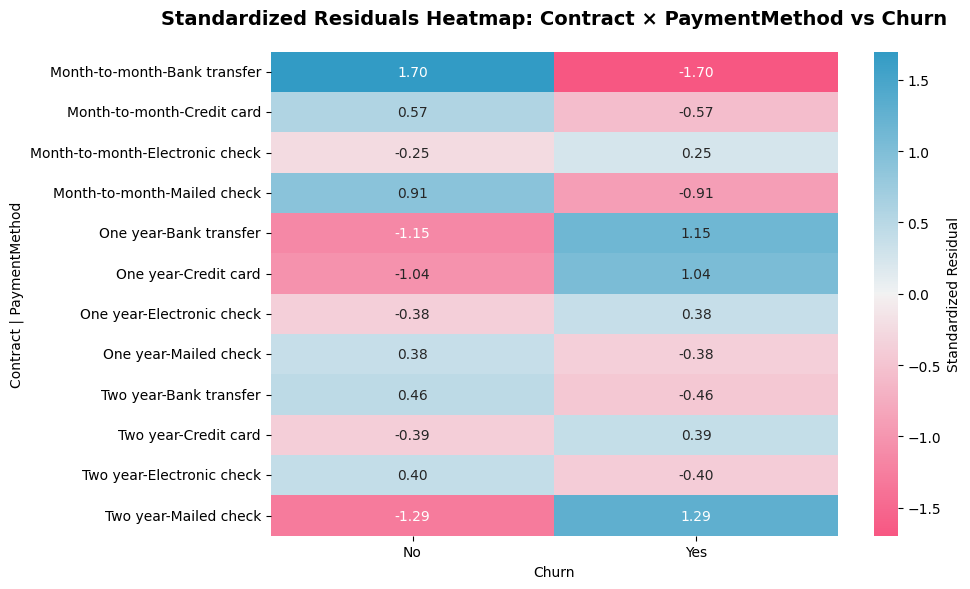

In [103]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency_contract_payment.values)
expected_df = pd.DataFrame(expected, index=contingency_contract_payment.index, columns=contingency_contract_payment.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency_contract_payment.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency_contract_payment.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency_contract_payment.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency_contract_payment.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency_contract_payment.index, columns=contingency_contract_payment.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: Contract × PaymentMethod vs Churn", weight="bold", fontsize=14, pad=20)
plt.ylabel("Contract | PaymentMethod")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

* **Statistical evidence**: The Chi-Square test (χ² = 8.21, p ≈ 0.69) shows **no statistically significant interaction** between contract type and payment method on churn.
* **Observed trend**:

  * Customers on **Month-to-Month contracts** show higher churn risk across all payment methods.
  * For **One-year and Two-year contracts**, churn is generally **lower when paired with auto-payment methods** (Credit card / Bank transfer).
* **Standardized residuals**: Slightly negative for churn under long-term contracts with Credit card / Bank transfer, indicating fewer churn cases than expected.
* **Business implication**: While not statistically significant, there is a **practical trend** suggesting that encouraging **long-term contracts with auto-pay options** can reduce churn.

### Do customers with **short tenure (<12 months)** and **Month-to-Month contracts** show higher churn risk compared to those with longer tenure?

In [104]:
def map_tenure(val):
    return "Short tenure" if val < 12 else "Longer tenure"

df["TenureGroup"] = df["tenure"].apply(map_tenure)

df_m_m_contracts = df[(df["Contract"] == "Month-to-month")]
churn_by_tenure_mm = pd.crosstab(
    df_m_m_contracts["TenureGroup"],
    df_m_m_contracts["Churn"],
    normalize="index"
) * 100

display(churn_by_tenure_mm)

contingency = pd.crosstab(
    df_m_m_contracts["TenureGroup"],
    df_m_m_contracts["Churn"],
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn,No,Yes
TenureGroup,,
Longer tenure,51.925321,48.074679
Short tenure,54.248366,45.751634


Chi2: 0.47238435678285373 p-value: 0.4918922932112041


**Answer**

* There is **no statistically significant difference** in churn rates between customers with **Month-to-Month + short tenure** and those with **Month-to-Month + longer tenure**.
* In other words, **tenure within the Month-to-Month group is not a key driver of churn** — customers leave at nearly the same rate regardless of their tenure length.

### For customers with **Fiber optic**, does churn decrease if they also subscribe to **Online Security or Tech Support**?

In [105]:
churn_by_internet_service = pd.crosstab(
    [df["InternetService"], df["OnlineSecurity"], df["TechSupport"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_internet_service)

contingency = pd.crosstab(
    [df["InternetService"], df["OnlineSecurity"], df["TechSupport"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn                                                           No        Yes
InternetService OnlineSecurity      TechSupport                              
DSL             No                  No                   46.943231  53.056769
                                    Yes                  53.937008  46.062992
                Yes                 No                   49.800000  50.200000
                                    Yes                  52.978723  47.021277
Fiber optic     No                  No                   52.642276  47.357724
                                    Yes                  48.670757  51.329243
                Yes                 No                   50.414938  49.585062
                                    Yes                  51.769912  48.230088
No              No internet service No internet service  50.320355  49.679645

Chi2: 7.741507674316032 p-value: 0.45911917978660777


Chi2: 7.7415 | dof: 8 | p-value: 0.459119


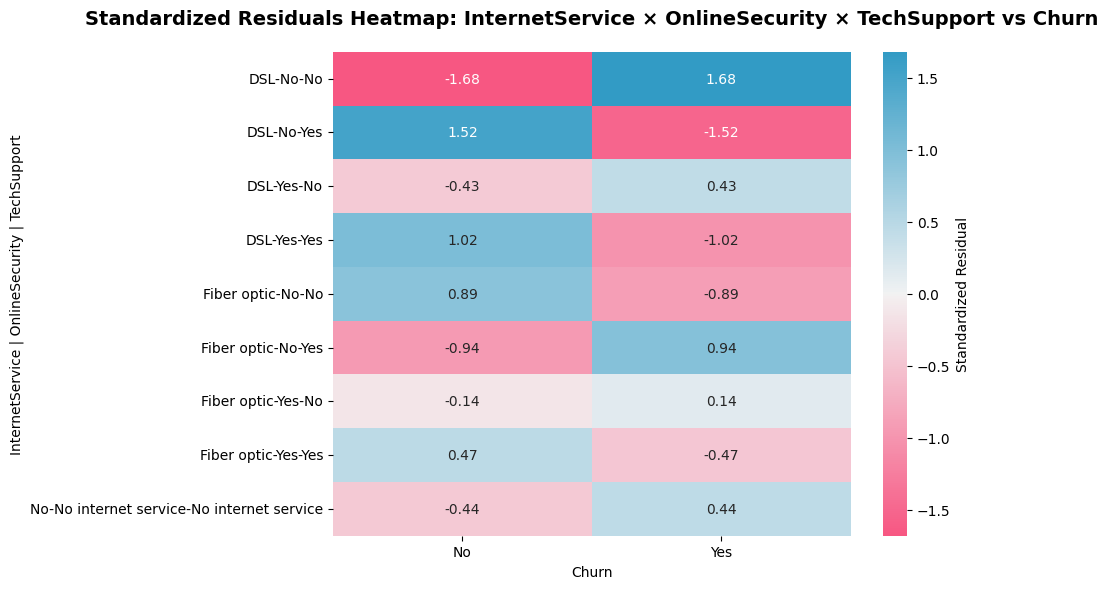

In [106]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency.values)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency.index, columns=contingency.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: InternetService × OnlineSecurity × TechSupport vs Churn",
          weight="bold", fontsize=14, pad=20)
plt.ylabel("InternetService | OnlineSecurity | TechSupport")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

Based on the **Standardized Residuals Heatmap (InternetService × OnlineSecurity × TechSupport vs Churn)**:

* For customers with **Fiber optic**:

  * Without **OnlineSecurity/TechSupport**, the standardized residual for churn = **+0.94**, meaning churn occurs **more often than expected**.
  * With **OnlineSecurity or TechSupport**, the standardized residual for churn = **-0.47**, meaning churn occurs **less often than expected**.

Therefore, for **Fiber optic customers**, subscribing to **Online Security or Tech Support effectively reduces churn**.

### Do customers with **no Partner & no Dependents** have higher churn than other groups?

In [107]:
churn_by_partner_dependent = pd.crosstab(
    [df["Partner"], df["Dependents"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_partner_dependent)

contingency = pd.crosstab(
    [df["Partner"], df["Dependents"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn                      No        Yes
Partner Dependents                      
No      No          51.095890  48.904110
        Yes         51.368421  48.631579
Yes     No          50.453368  49.546632
        Yes         49.965541  50.034459

Chi2: 0.6965126145551688 p-value: 0.8740239093232108


Chi2: 0.6965 | dof: 3 | p-value: 0.874024


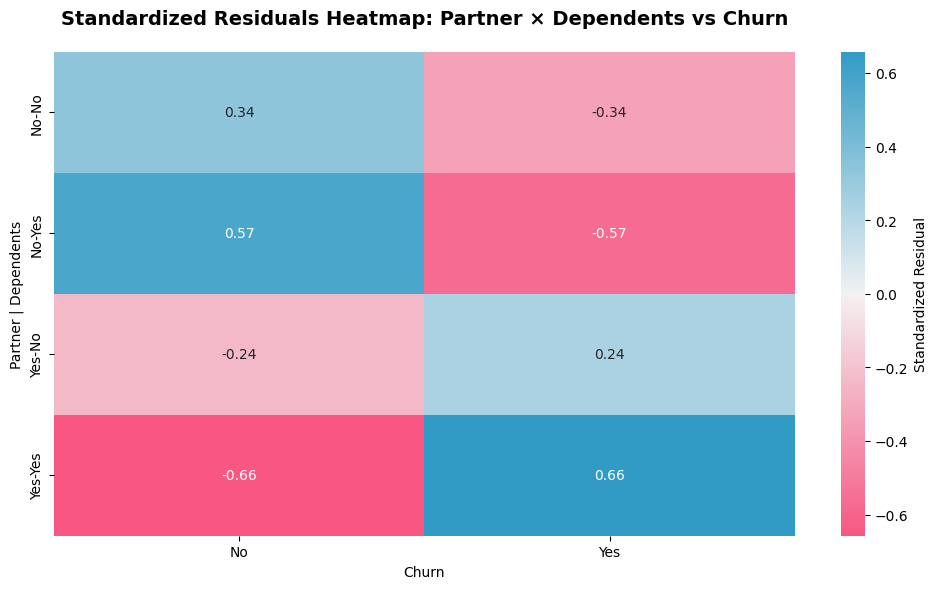

In [108]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency.values)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency.index, columns=contingency.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: Partner × Dependents vs Churn",
          weight="bold", fontsize=14, pad=20)
plt.ylabel("Partner | Dependents")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

Based on the **Standardized Residuals Heatmap (Partner × Dependents vs Churn)**:

* The **No Partner & No Dependents** group shows residuals = **+0.34 (No)** and **-0.34 (Yes)** → churn is slightly lower than expected, **not higher than other groups**.
* The **Yes Partner & Yes Dependents** group shows residual = **+0.66 (Yes)** → churn is higher than expected, indicating a greater risk of leaving.
* The **No Partner & Yes Dependents** group shows churn lower than expected (**-0.57**).

**Conclusion:** Customers with **No Partner & No Dependents** are **not the highest churn risk group**. In contrast, those with **both Partner and Dependents** are more likely to churn.

### Do customers paying **high MonthlyCharges** while on a **Month-to-Month contract** have a significantly higher churn rate?

In [109]:
df["isHighMonthlyCharges"] = (df["MonthlyCharges"] > df["MonthlyCharges"].median()).astype(int)

churn_by_HighMonthlyCharges = pd.crosstab(
    [df["isHighMonthlyCharges"], df["Contract"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_HighMonthlyCharges)

contingency = pd.crosstab(
    [df["isHighMonthlyCharges"], df["Contract"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn                                       No        Yes
isHighMonthlyCharges Contract                            
0                    Month-to-month  56.000000  44.000000
                     One year        48.609681  51.390319
                     Two year        48.710010  51.289990
1                    Month-to-month  48.627451  51.372549
                     One year        50.457782  49.542218
                     Two year        51.867663  48.132337

Chi2: 16.757579346025135 p-value: 0.004983258492941141


Chi2: 16.7576 | dof: 5 | p-value: 0.004983


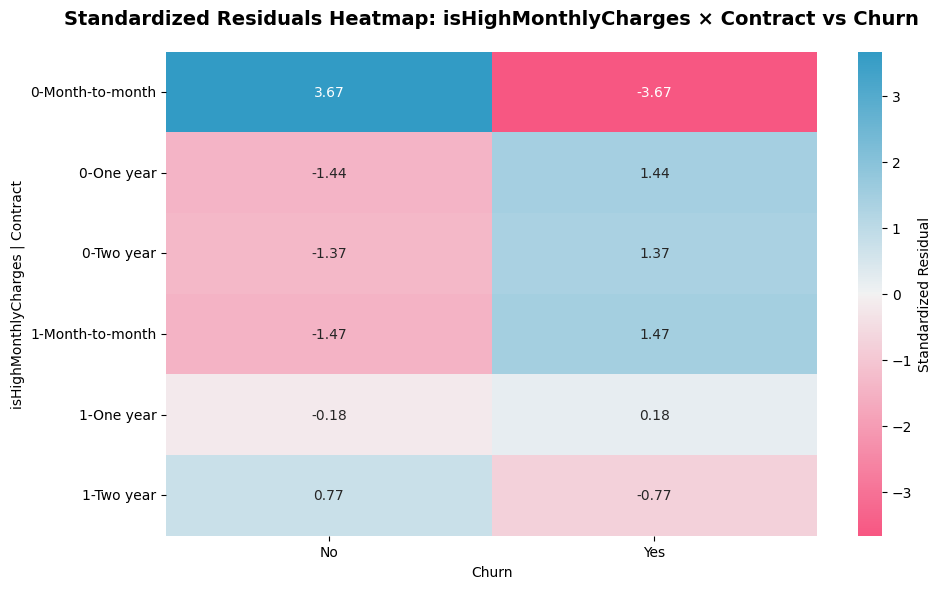

In [110]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency.values)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency.index, columns=contingency.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: isHighMonthlyCharges × Contract vs Churn",
          weight="bold", fontsize=14, pad=20)
plt.ylabel("isHighMonthlyCharges | Contract")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

**Yes** — customers with **high MonthlyCharges combined with Month-to-Month contracts** show a **notably higher churn rate**.

* The Chi-Square test result (**p-value ≈ 0.005 < 0.05**) confirms that this difference is **statistically significant**.
* The standardized residuals highlight that churn is **over-represented** in this group, with values exceeding the ±3 threshold (≈ ±3.67).

### Do they tend to choose **Electronic check** rather than more convenient payment methods?

In [111]:
churn_by_HighMonthlyCharges_CT_PM = pd.crosstab(
    [df["isHighMonthlyCharges"], df["Contract"], df["PaymentMethod"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_HighMonthlyCharges_CT_PM)

contingency = pd.crosstab(
    [df["isHighMonthlyCharges"], df["Contract"], df["PaymentMethod"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn                                                        No        Yes
isHighMonthlyCharges Contract       PaymentMethod                         
0                    Month-to-month Bank transfer     59.836066  40.163934
                                    Credit card       57.831325  42.168675
                                    Electronic check  51.291513  48.708487
                                    Mailed check      55.508475  44.491525
                     One year       Bank transfer     45.945946  54.054054
                                    Credit card       48.484848  51.515152
                                    Electronic check  45.867769  54.132231
                                    Mailed check      53.909465  46.090535
                     Two year       Bank transfer     49.773756  50.226244
                                    Credit card       53.169014  46.830986
                                    Electronic check  48.290598  51.709402
                                    Mailed check      42.608696  57.391304
1                    Month-to-month Bank transfer     49.253731  50.746269
                                    Credit card       45.726496  54.273504
                                    Electronic check  48.962656  51.037344
                                    Mailed check      50.180505  49.819495
                     One year       Bank transfer     50.210970  49.789030
                                    Credit card       48.510638  51.489362
                                    Electronic check  53.558052  46.441948
                                    Mailed check      49.180328  50.819672
                     Two year       Bank transfer     53.617021  46.382979
                                    Credit card       45.991561  54.008439
                                    Electronic check  54.935622  45.064378
                                    Mailed check      53.017241  46.982759

Chi2: 38.06439700747928 p-value: 0.025069557177901214


Chi2: 38.0644 | dof: 23 | p-value: 0.025070


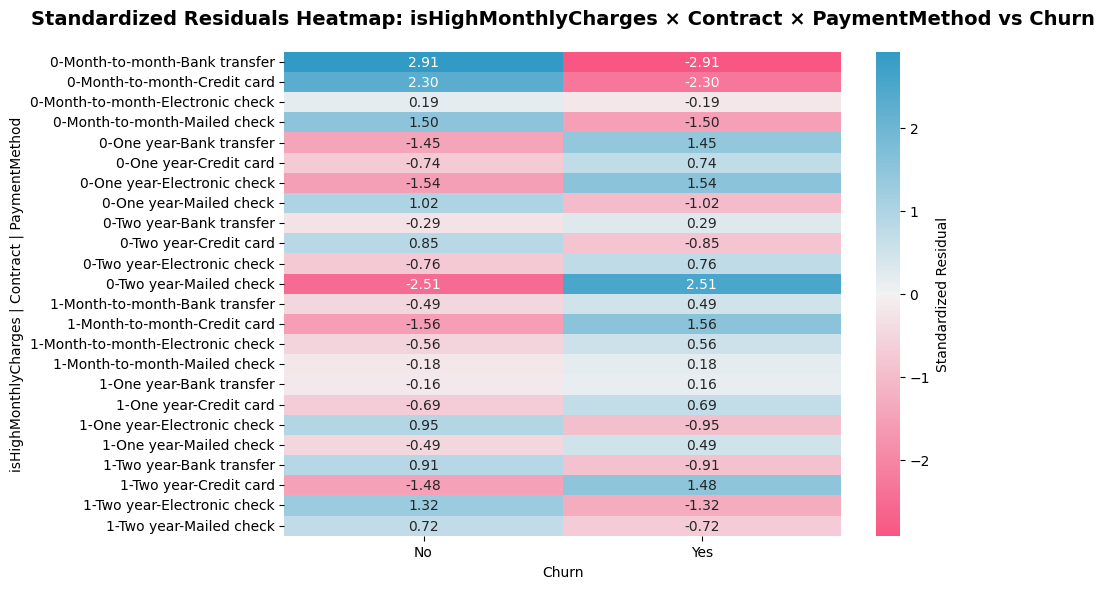

In [112]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency.values)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency.index, columns=contingency.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: isHighMonthlyCharges × Contract × PaymentMethod vs Churn",
          weight="bold", fontsize=14, pad=20)
plt.ylabel("isHighMonthlyCharges | Contract | PaymentMethod")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

* For the group **High MonthlyCharges + Month-to-Month + Electronic check**, the standardized residual ≈ **-0.56 (No)** and **0.56 (Yes)** → meaning churn is **slightly higher than expected**.
* This indicates that they **tend to churn more** when using **Electronic check**, but the effect is not very strong (just enough to show a slight difference, not as pronounced as Bank transfer or Mailed check in some groups).
* Therefore, we can say: customers with high charges and short-term contracts **do not necessarily prefer Electronic check more than other methods** — but if they do choose it, this group **shows a churn rate slightly above expectations**.

### Do customers using **multiple streaming services** but with **short tenure** churn more?

In [113]:
churn_by_TenureGroup_StreamingServices = pd.crosstab(
    [df["TenureGroup"], df["StreamingTV"], df["StreamingMovies"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_TenureGroup_StreamingServices)

contingency = pd.crosstab(
    [df["TenureGroup"], df["StreamingTV"], df["StreamingMovies"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn                                                         No        Yes
TenureGroup   StreamingTV         StreamingMovies                          
Longer tenure No                  No                   50.679852  49.320148
                                  Yes                  50.360577  49.639423
              No internet service No internet service  50.058617  49.941383
              Yes                 No                   49.574727  50.425273
                                  Yes                  52.049689  47.950311
Short tenure  No                  No                   53.191489  46.808511
                                  Yes                  48.818898  51.181102
              No internet service No internet service  51.702786  48.297214
              Yes                 No                   49.659864  50.340136
                                  Yes                  56.886228  43.113772

Chi2: 4.602868552046002 p-value: 0.8674634686760455


Chi2: 4.6029 | dof: 9 | p-value: 0.867463


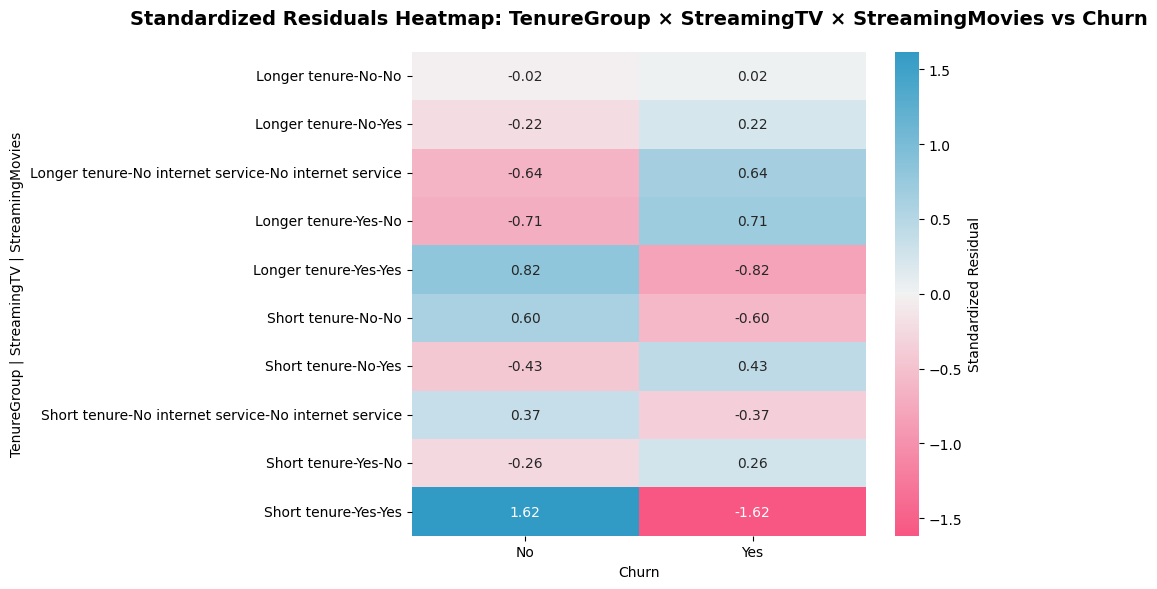

In [114]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency.values)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency.index, columns=contingency.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: TenureGroup × StreamingTV × StreamingMovies vs Churn",
          weight="bold", fontsize=14, pad=20)
plt.ylabel("TenureGroup | StreamingTV | StreamingMovies")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

**No**. In fact, this group shows a churn rate that is **slightly lower than expected**. This indicates that using multiple streaming services **does not increase churn** among short-tenure customers.

### Do senior customers show higher churn when on **Month-to-Month contracts** compared to One-year/Two-year contracts?

In [115]:
churn_by_TenureGroup_StreamingServices = pd.crosstab(
    [df["SeniorCitizen"], df["Contract"]],
    df["Churn"],
    normalize="index"
) * 100

display(churn_by_TenureGroup_StreamingServices)

contingency = pd.crosstab(
    [df["SeniorCitizen"], df["Contract"]],
    df["Churn"]
)
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)

Churn                                No        Yes
SeniorCitizen Contract                            
No            Month-to-month  51.844467  48.155533
              One year        50.102459  49.897541
              Two year        49.425287  50.574713
Yes           Month-to-month  52.704031  47.295969
              One year        48.977505  51.022495
              Two year        51.106428  48.893572

Chi2: 4.144418476592332 p-value: 0.5288162893496349


Chi2: 4.1444 | dof: 5 | p-value: 0.528816


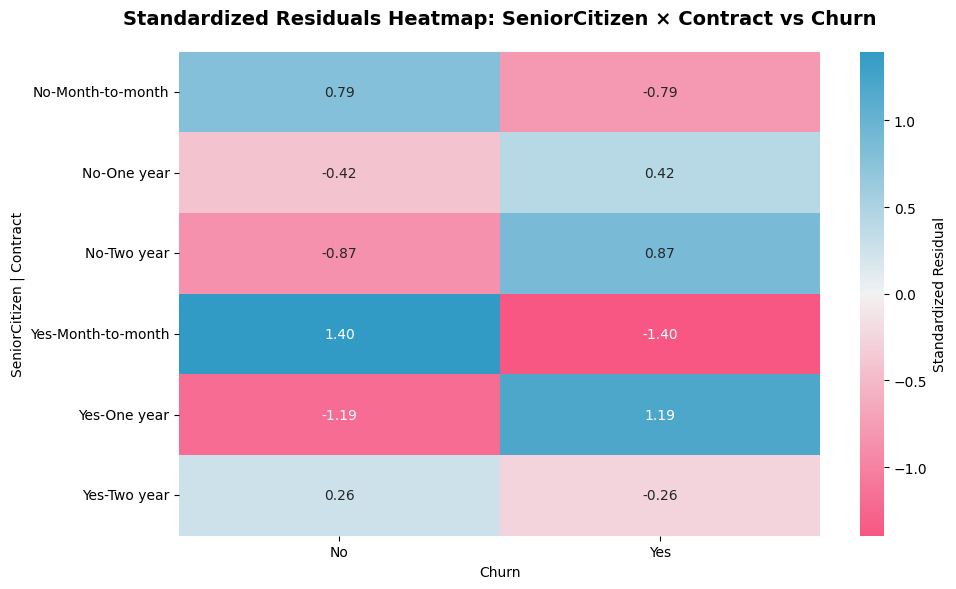

In [116]:
# 1) Chi-square test + expected counts
chi2, p, dof, expected = chi2_contingency(contingency.values)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print(f"Chi2: {chi2:.4f} | dof: {dof} | p-value: {p:.6f}")

# 2) Standardized residuals (adjusted)
#    r_ij = (O_ij - E_ij) / sqrt(E_ij * (1 - row_prob_i) * (1 - col_prob_j))
row_sums = contingency.sum(axis=1).values[:, None]        # shape (R,1)
col_sums = contingency.sum(axis=0).values[None, :]        # shape (1,C)
grand_total = contingency.values.sum()

row_prob = row_sums / grand_total               # R x 1
col_prob = col_sums / grand_total               # 1 x C

denom = np.sqrt(expected * (1 - row_prob) * (1 - col_prob))
std_resid = (contingency.values - expected) / denom

std_resid_df = pd.DataFrame(std_resid, index=contingency.index, columns=contingency.columns)

# 3) Heatmap — display nicely the multiindex
plt.figure(figsize=(10,6))
sns.heatmap(
    std_resid_df,
    annot=True, fmt=".2f", cmap=cmap, center=0,
    cbar_kws={"label": "Standardized Residual"}
)
plt.title("Standardized Residuals Heatmap: SeniorCitizen × Contract vs Churn",
          weight="bold", fontsize=14, pad=20)
plt.ylabel("SeniorCitizen | Contract")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()

**Answer**

* **Senior + Month-to-Month:** **No = +1.40**, **Yes = −1.40** → *fewer* seniors churn than expected.
* **Senior + One-year:** **No = −1.19**, **Yes = +1.19** → *more* seniors churn than expected.
* **Senior + Two-year:** residuals ≈ **±0.26** → churn close to expectation (no strong deviation).

**Conclusion:** Senior customers **do not** show higher churn on Month-to-Month contracts; they actually churn **less than expected**. If anything, churn is relatively **higher** for seniors on **One-year** contracts, while **Two-year** looks neutral.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


In [118]:
# isHighMonthlyCharges
choices_isHighMonthlyCharges = ["No", "Yes"]
conditions = [
    (df["isHighMonthlyCharges"] == 0),
    (df["isHighMonthlyCharges"] == 1)
]
df["isHighMonthlyCharges"] = np.select(conditions, choices_SeniorCitizen, default="Unknown")

cat_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                "Contract", "PaperlessBilling", "PaymentMethod", "TenureGroup", "isHighMonthlyCharges"]

# Make sure objective to category
convert_cat(features=cat_features, df=df)

df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
df["Churn"] = df["Churn"].astype("int8")

# Display information about the DataFrames
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                5880 non-null   category
 1   SeniorCitizen         5880 non-null   category
 2   Partner               5880 non-null   category
 3   Dependents            5880 non-null   category
 4   tenure                5880 non-null   int64   
 5   PhoneService          5880 non-null   category
 6   MultipleLines         5880 non-null   category
 7   InternetService       5880 non-null   category
 8   OnlineSecurity        5880 non-null   category
 9   OnlineBackup          5880 non-null   category
 10  DeviceProtection      5880 non-null   category
 11  TechSupport           5880 non-null   category
 12  StreamingTV           5880 non-null   category
 13  StreamingMovies       5880 non-null   category
 14  Contract              5880 non-null   categor

## Re-checking Skew

In [119]:
skew_feature, skew_df = check_skewness(data=df, numerical_features=num_features)


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
TotalCharges                        |  +0.814569 | Moderately skewed
MonthlyCharges                      |  -0.015878 | Approximately symmetric
tenure                              |  -0.003408 | Approximately symmetric
---------------------------------------------------------------------------


In [ ]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None    
):
    """
    Handle skewed numerical features by applying appropriate transformations.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [122]:
processed_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df, num_features=skew_feature)
num_features = ["MonthlyCharges", "tenure", "PT_TotalCharges"]
skew_feature_combined, skew_combined_df = check_skewness(data=processed_df, numerical_features=num_features)


🔍 Skewness for dataset:
---------------------------------------------------------------------------
Feature                             | Skewness   | Remark
---------------------------------------------------------------------------
PT_TotalCharges                     |  -0.098930 | Approximately symmetric
MonthlyCharges                      |  -0.015878 | Approximately symmetric
tenure                              |  -0.003408 | Approximately symmetric
---------------------------------------------------------------------------


**Observations from the Skewness Table (`processed_df`):**

**Skewed**:

* The features `TotalCharges` skewness.

**Approximately Symmetric**:

* Several features, such as:

  * `PT_TotalCharges` close to zero.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

## Re-check Outliers

In [132]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier
✅ No outliers detected in the selected features.


## Create Test Set

🔴 Suppose you chatted with experts who told you that the **PT_TotalCharges** is a very important attribute to predict **Churn**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of total charge in the whole dataset. Since the total charge is a continuous numerical attribute, we first need to create an category attribute.

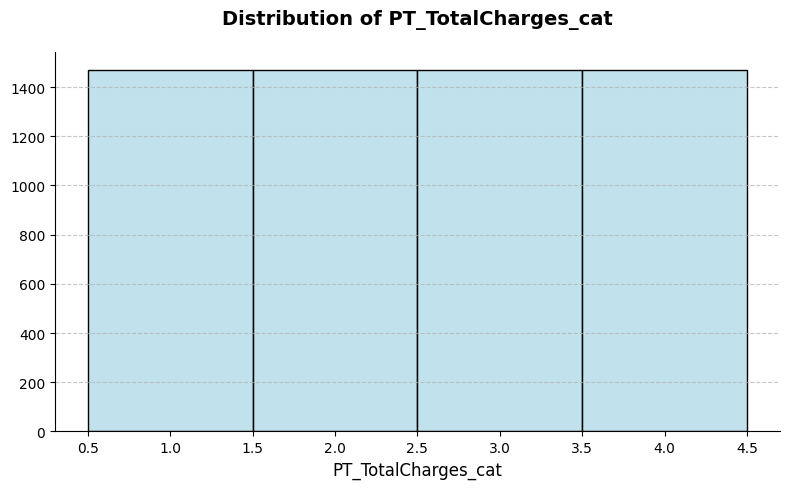

In [125]:
processed_df["PT_TotalCharges_cat"] = pd.qcut(processed_df["PT_TotalCharges"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_df, x="PT_TotalCharges_cat", color="lightblue", edgecolor="black")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Distribution of PT_TotalCharges_cat", fontsize=14, weight="bold",pad=20)
plt.xlabel("PT_TotalCharges_cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [128]:
split = StratifiedShuffleSplit(n_splits=Config.N_SPLIT, test_size=Config.TEST_SIZE, random_state=Config.SEED)
for train_index, test_index in split.split(processed_df, processed_df["PT_TotalCharges_cat"]):
    start_train_set = processed_df.loc[train_index]
    start_test_set = processed_df.loc[test_index]

In [129]:
# Now we should remove the PT_TotalCharges_cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_TotalCharges_cat", axis=1, inplace=True)

## Scale and Encode

In [131]:
df_new = start_train_set.drop("Churn", axis=1)
df_label = start_train_set["Churn"].copy()

In [133]:
num_transfomer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_transfomer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transfomer, num_features),
        ("cat", cat_transfomer, cat_features),
    ]
)

preprocessor.fit(df_new)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MonthlyCharges', 'tenure',
                                  'PT_TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'TenureGroup', 'isHighMonthlyCharges'])])

In [136]:
df_new_prepared = preprocessor.transform(df_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num__MonthlyCharges',
 'num__tenure',
 'num__PT_TotalCharges',
 'cat__gender_Female',
 'cat__gender_Male',
 'cat__SeniorCitizen_No',
 'cat__SeniorCitizen_Yes',
 'cat__Partner_No',
 'cat__Partner_Yes',
 'cat__Dependents_No',
 'cat__Dependents_Yes',
 'cat__PhoneService_No',
 'cat__PhoneService_Yes',
 'cat__MultipleLines_No',
 'cat__MultipleLines_No phone service',
 'cat__MultipleLines_Yes',
 'cat__InternetService_DSL',
 'cat__InternetService_Fiber optic',
 'cat__InternetService_No',
 'cat__OnlineSecurity_No',
 'cat__OnlineSecurity_No internet service',
 'cat__OnlineSecurity_Yes',
 'cat__OnlineBackup_No',
 'cat__OnlineBackup_No internet service',
 'cat__OnlineBackup_Yes',
 'cat__DeviceProtection_No',
 'cat__DeviceProtection_No internet service',
 'cat__DeviceProtection_Yes',
 'cat__TechSupport_No',
 'cat__TechSupport_No internet service',
 'cat__TechSupport_Yes',
 'cat__StreamingTV_No',
 'cat__StreamingTV_No internet service',
 'cat__StreamingTV_Yes',
 'cat__StreamingMovies_No',
 'cat__

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [135]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=Config.SEED)
models = [
    LinearSVC(max_iter=Config.MAX_ITER, random_state=42),
    SVC(kernel="rbf", random_state=Config.SEED),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=Config.MAX_ITER, random_state=Config.SEED),
    DecisionTreeClassifier(max_depth=5, random_state=Config.SEED),
    RandomForestClassifier(n_estimators=100, random_state=Config.SEED),
    ExtraTreesClassifier(random_state=Config.SEED),
    AdaBoostClassifier(random_state=Config.SEED),
    XGBClassifier(n_estimators= 2000, max_depth= 4, eval_metric = "logloss",
                  random_state=Config.SEED, min_child_weight= 2, gamma=0.9,
                  subsample=0.8, colsample_bytree=0.8, objective= "binary:logistic",
                  nthread= -1),
    MLPClassifier(max_iter=Config.MAX_ITER, random_state=Config.SEED),
    GradientBoostingClassifier(random_state=Config.SEED),
    RidgeClassifier(alpha=1.0, random_state=Config.SEED, max_iter=Config.MAX_ITER),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(verbose=0, random_seed=Config.SEED),
    BaggingClassifier(random_state=Config.SEED),
    LGBMClassifier(random_state=Config.SEED, verbosity=-1),
    HistGradientBoostingClassifier(random_state=Config.SEED, max_iter=Config.MAX_ITER)
]

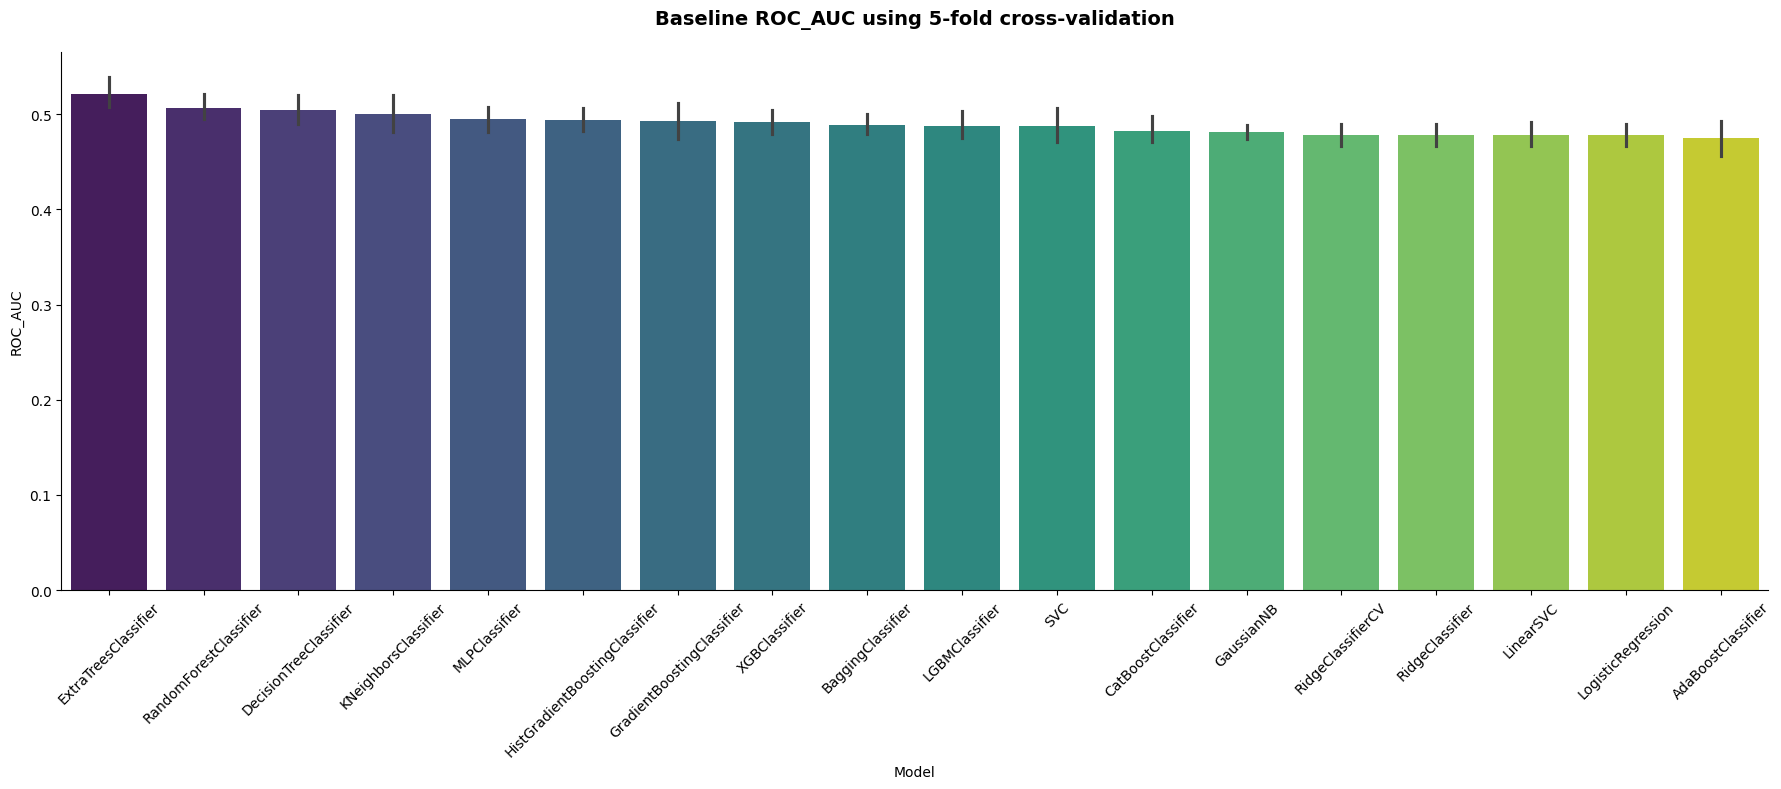

,Mean,Std,N
model_name,,,
ExtraTreesClassifier,0.520934,0.020895,5
RandomForestClassifier,0.506414,0.017043,5
DecisionTreeClassifier,0.504632,0.019439,5
KNeighborsClassifier,0.500436,0.025581,5
MLPClassifier,0.495399,0.016836,5
HistGradientBoostingClassifier,0.493722,0.015353,5
GradientBoostingClassifier,0.493212,0.024808,5
XGBClassifier,0.492117,0.016473,5
BaggingClassifier,0.488446,0.013903,5


In [138]:
def generate_baseline_results(models=models, X=df_new_prepared, y=df_label,
                              metric="roc_auc", cv=kfold, plot_result=False):
    
    X_ = X.toarray() if hasattr(X, "toarray") else X
    entries = []
    for model in models:
        model_name = getattr(model, "name", model.__class__.__name__)
        scores = cross_val_score(model, X_, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, s in enumerate(scores, start=1):
            entries.append((model_name, fold_idx, s))

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "score"])

    summary = (cv_df.groupby("model_name")["score"]
                    .agg(Mean="mean", Std="std", N="size")
                    .sort_values("Mean", ascending=False))

    if plot_result:
        order = summary.index.tolist()
        plt.figure(figsize=(18, 8))
        sns.barplot(data=cv_df, x="model_name", y="score", order=order, palette="viridis")
        sns.despine()
        title_metric = metric.upper() if isinstance(metric, str) else "Score"
        nfolds = getattr(cv, "n_splits", "CV")
        plt.title(f"Baseline {title_metric} using {nfolds}-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model"); plt.ylabel(title_metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return summary

generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [139]:
def shap_plot(model, X_test, list_feature, type = None):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [140]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)

    # Plot 1
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve", fontsize=14, weight="bold", pad=20)
    ax[1, 0].legend()

    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))
    return rocScore

In [141]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    rocScore = plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)
    return rocScore

In [142]:
X_val = start_test_set.drop("Churn", axis=1)
y_val = start_test_set["Churn"].copy()
X_val_prepared = preprocessor.transform(X_val)

## ExtraTreesClassifier

In [153]:
param_etc = {
 "n_estimators": 1900,
 "max_depth": 26,
 "min_samples_split": 2,
 "min_samples_leaf": 1,
 "criterion": "gini",
 "bootstrap": False,
 "random_state": Config.SEED,
 "max_features": "log2"
 }

model_etc = ExtraTreesClassifier(**param_etc)
model_etc

ExtraTreesClassifier(max_depth=26, max_features='log2', n_estimators=1900,
                     random_state=42)

Evaluating ExtraTreesClassifier...


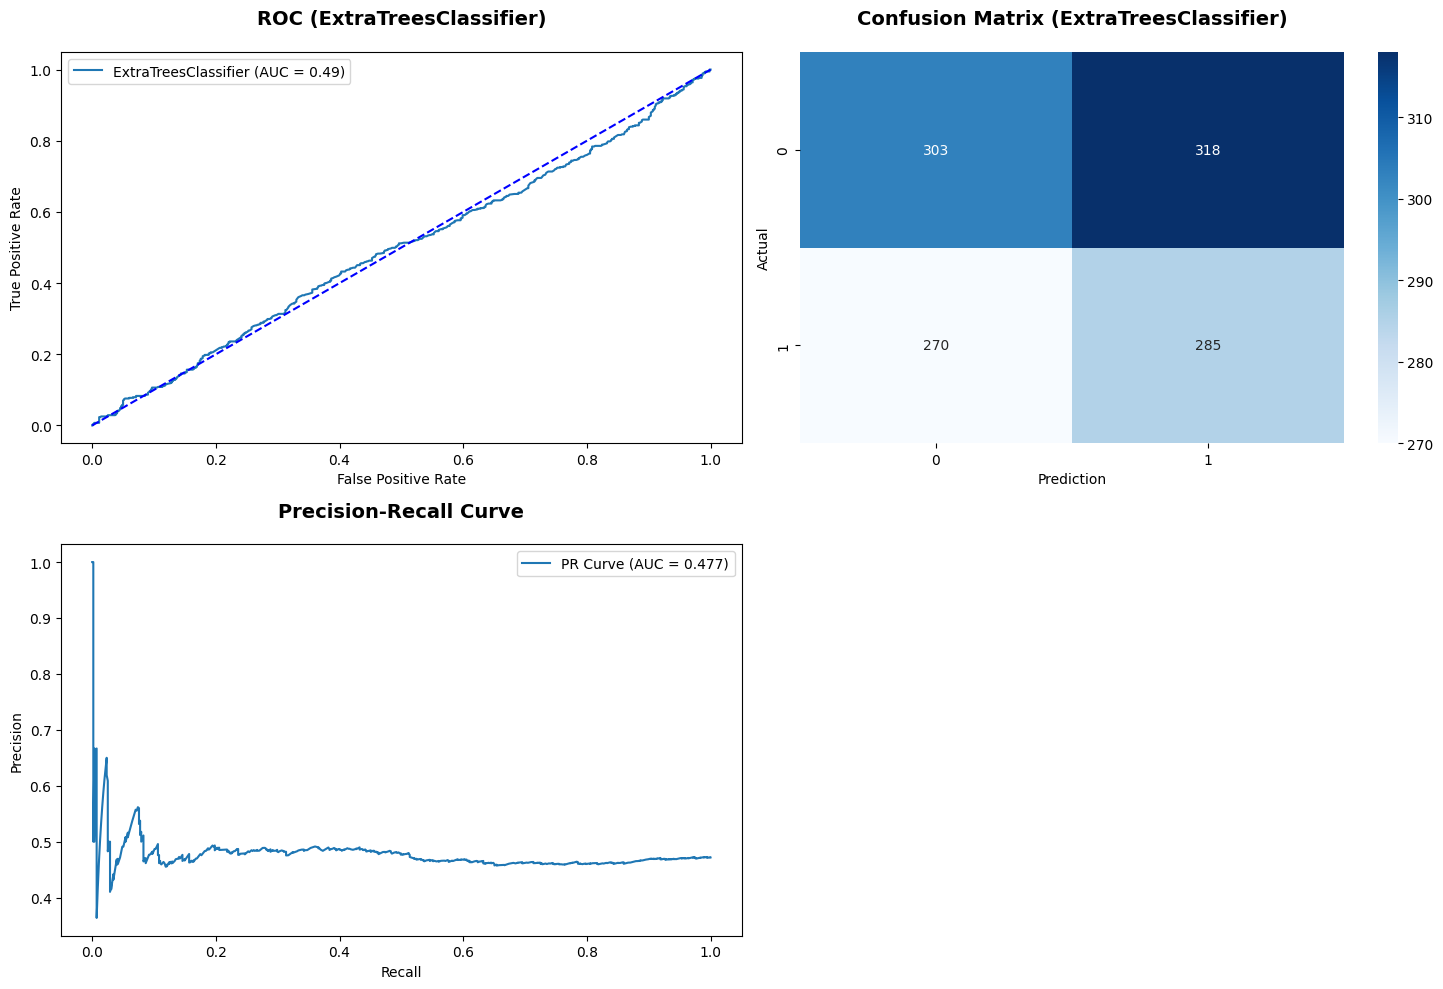

              precision    recall  f1-score   support

           0       0.53      0.49      0.51       621
           1       0.47      0.51      0.49       555

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.50      1176
weighted avg       0.50      0.50      0.50      1176



In [154]:
rocScore_etc = evaluate_model(model = model_etc, X_train=df_new_prepared, X_val=X_val_prepared,
                               y_train=df_label, y_val=y_val, figsize=(15, 10))

## RandomForestClassifier

In [161]:
param_rf = {
 "n_estimators": 200,
 "max_depth": 32,
 "max_features": "sqrt",
 "min_samples_leaf": 1,
 "random_state": Config.SEED,
 "criterion": "log_loss"
}

model_rf = RandomForestClassifier(**param_rf)
model_rf

RandomForestClassifier(criterion='log_loss', max_depth=32, n_estimators=200,
                       random_state=42)

Evaluating RandomForestClassifier...


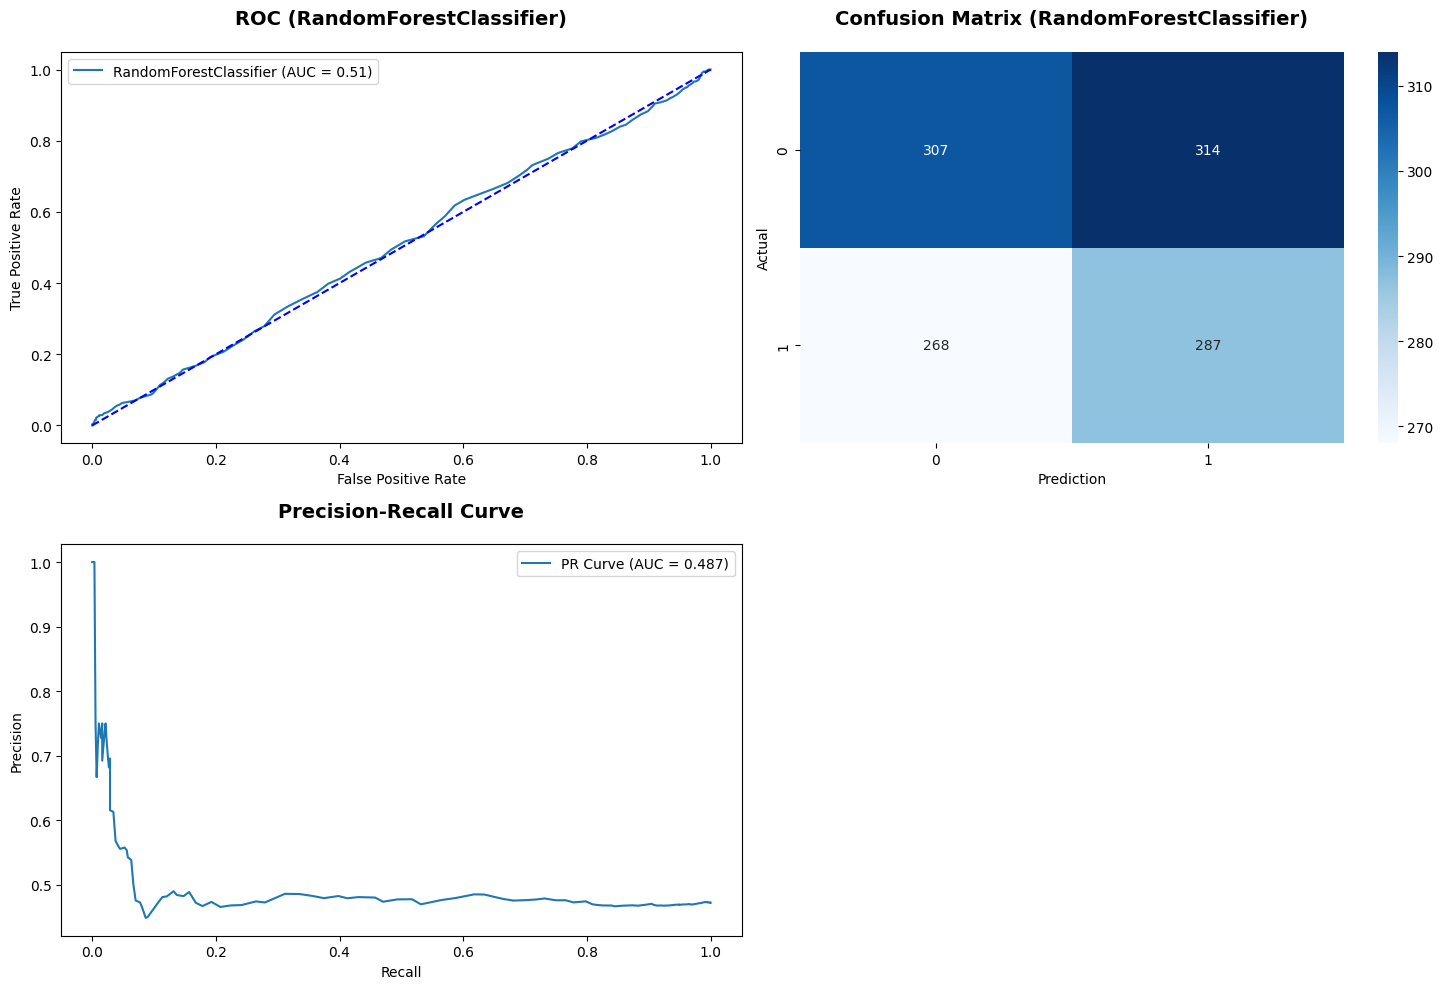

              precision    recall  f1-score   support

           0       0.53      0.49      0.51       621
           1       0.48      0.52      0.50       555

    accuracy                           0.51      1176
   macro avg       0.51      0.51      0.50      1176
weighted avg       0.51      0.51      0.51      1176



In [162]:
rocScore_rf = evaluate_model(model = model_rf, X_train=df_new_prepared, X_val=X_val_prepared,
                               y_train=df_label, y_val=y_val, figsize=(15, 10))

## DecisionTreeClassifier

In [167]:
param_dt = {
"criterion": "entropy",
"splitter": "best",
"max_depth": 24,
"min_samples_split": 53,
"min_samples_leaf": 20,
"max_features": "sqrt",
"random_state": Config.SEED
}

model_dt = DecisionTreeClassifier(**param_dt)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=24, max_features='sqrt',
                       min_samples_leaf=20, min_samples_split=53,
                       random_state=42)

Evaluating DecisionTreeClassifier...


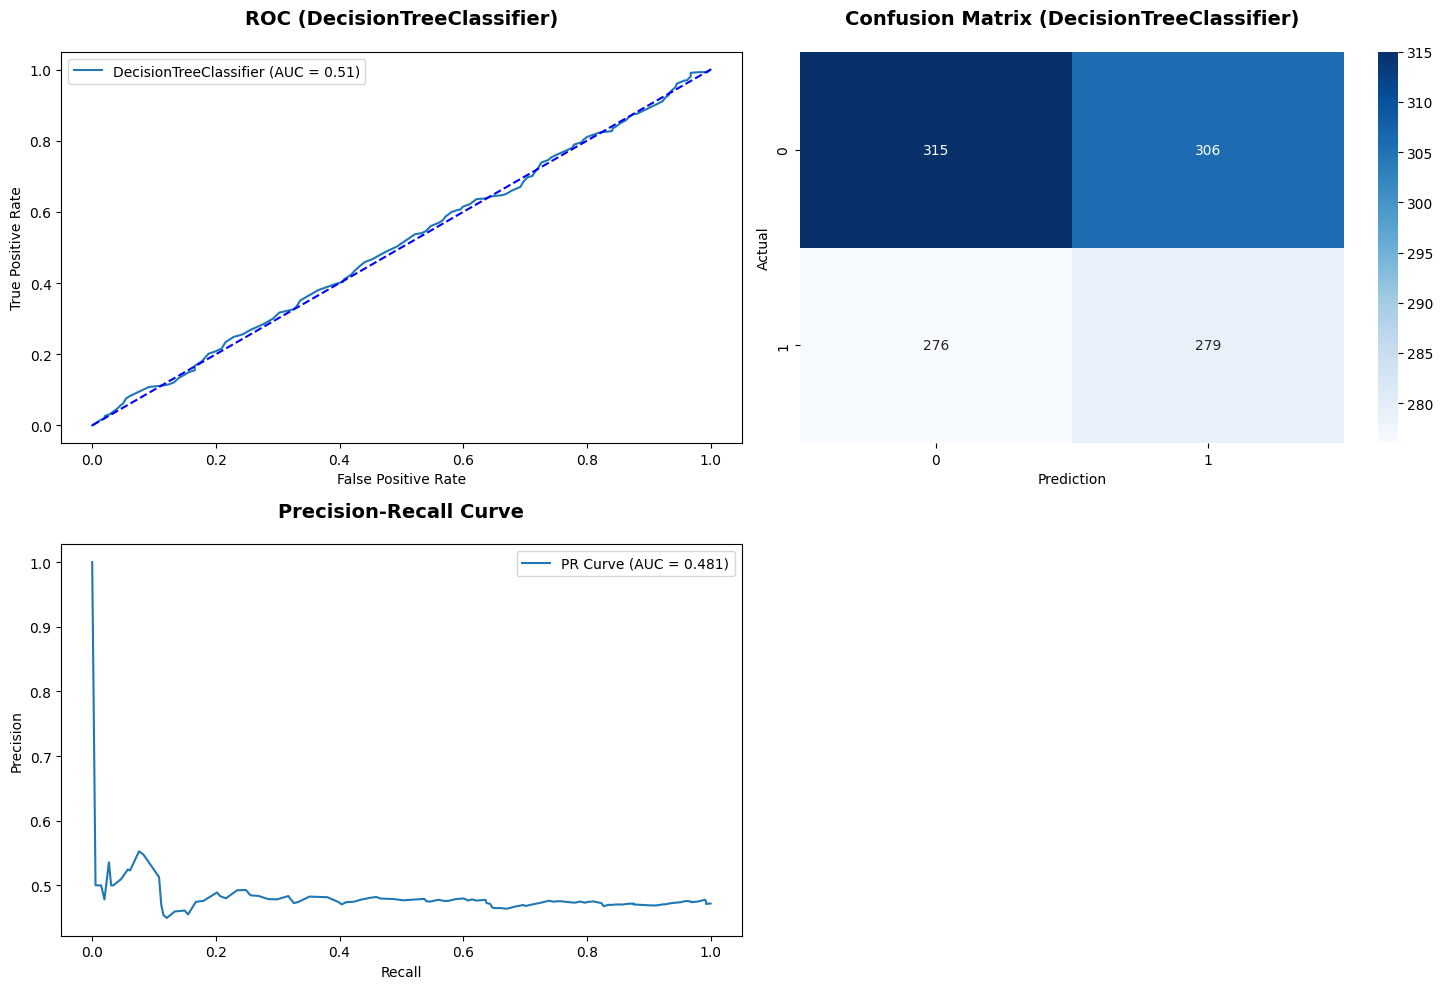

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       621
           1       0.48      0.50      0.49       555

    accuracy                           0.51      1176
   macro avg       0.50      0.50      0.50      1176
weighted avg       0.51      0.51      0.51      1176



In [168]:
rocScore_dt = evaluate_model(model = model_dt, X_train=df_new_prepared, X_val=X_val_prepared,
                               y_train=df_label, y_val=y_val, figsize=(15, 10))

## HistGradientBoostingClassifier

In [171]:
param_hgb = {
 "max_iter": Config.MAX_ITER,
 "learning_rate": 0.05447431296208594,
 "max_depth": 5,
 "max_leaf_nodes": 90,
 "min_samples_leaf": 200,
 "l2_regularization": 0.0003403959395866285,
 "max_bins": 68,
 "early_stopping": "auto",
 "validation_fraction": 0.14458981791510414,
 "n_iter_no_change": 23
}

model_hgb = HistGradientBoostingClassifier(**param_hgb)
model_hgb

HistGradientBoostingClassifier(l2_regularization=0.0003403959395866285,
                               learning_rate=0.05447431296208594, max_bins=68,
                               max_depth=5, max_iter=50000, max_leaf_nodes=90,
                               min_samples_leaf=200, n_iter_no_change=23,
                               validation_fraction=0.14458981791510414)

Evaluating HistGradientBoostingClassifier...


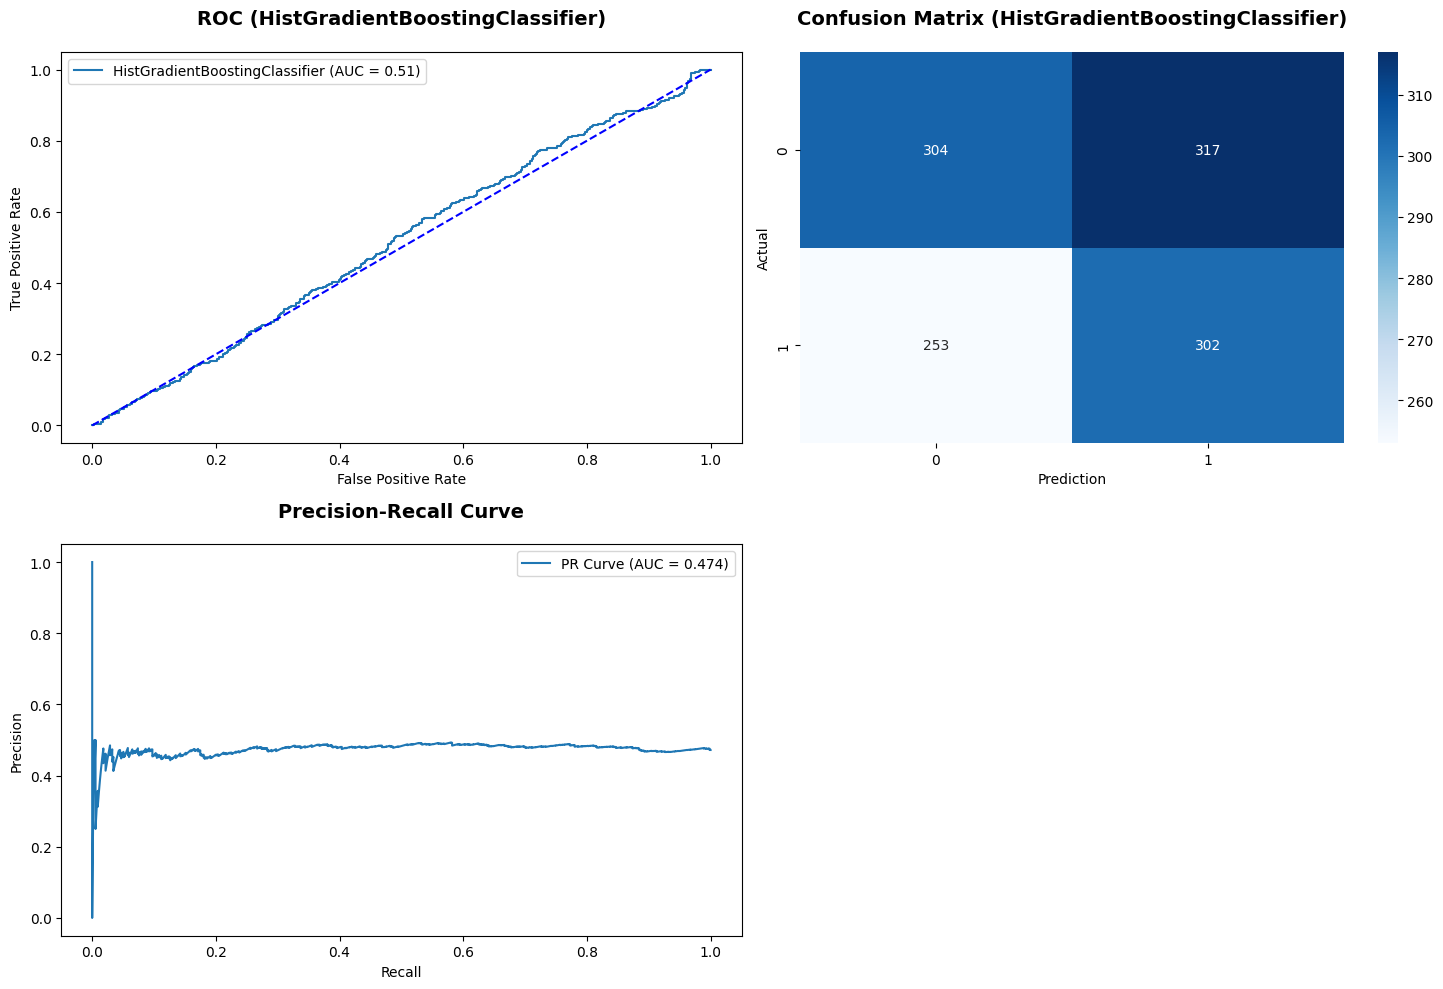

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       621
           1       0.49      0.54      0.51       555

    accuracy                           0.52      1176
   macro avg       0.52      0.52      0.52      1176
weighted avg       0.52      0.52      0.52      1176



In [172]:
rocScore_hgb = evaluate_model(model = model_hgb, X_train=df_new_prepared, X_val=X_val_prepared,
                               y_train=df_label, y_val=y_val, figsize=(15, 10))

## XGBClassifier

In [177]:
param_xgb = {
"n_estimators": 300,
"learning_rate": 0.2794677415767831,
"max_depth": 4,
"min_child_weight": 2.324814535291222,
"subsample": 0.6354380234789714,
"colsample_bytree": 0.587973459177215,
"gamma": 0.5530174595696418,
"reg_alpha": 3.5448767717990937e-06,
"reg_lambda": 4.9239549262715816e-05,
"objective": "binary:logistic",
"eval_metric": "auc",
"tree_method": "hist",
"random_state": Config.SEED,
"n_jobs": -1,
"verbosity": 0
}

model_xgb = XGBClassifier(**param_xgb)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.587973459177215, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=0.5530174595696418, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2794677415767831,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2.324814535291222, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

Evaluating XGBClassifier...


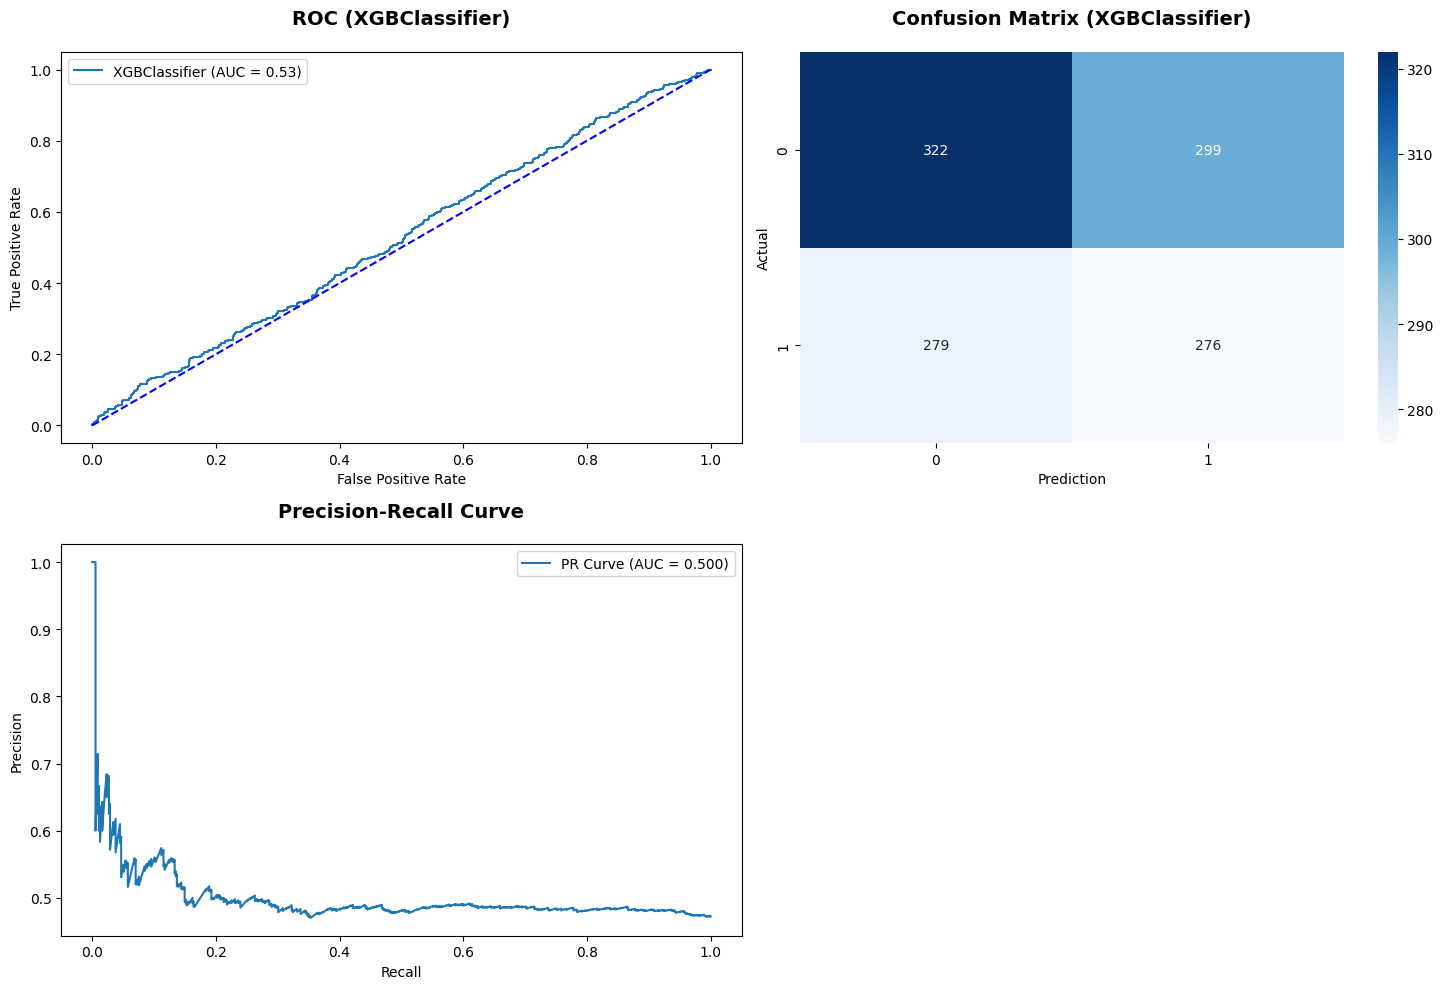

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       621
           1       0.48      0.50      0.49       555

    accuracy                           0.51      1176
   macro avg       0.51      0.51      0.51      1176
weighted avg       0.51      0.51      0.51      1176



In [178]:
rocScore_xgb = evaluate_model(model = model_xgb, X_train=df_new_prepared, X_val=X_val_prepared,
                               y_train=df_label, y_val=y_val, figsize=(15, 10))

## VotingClassifier

Evaluating VotingClassifier...


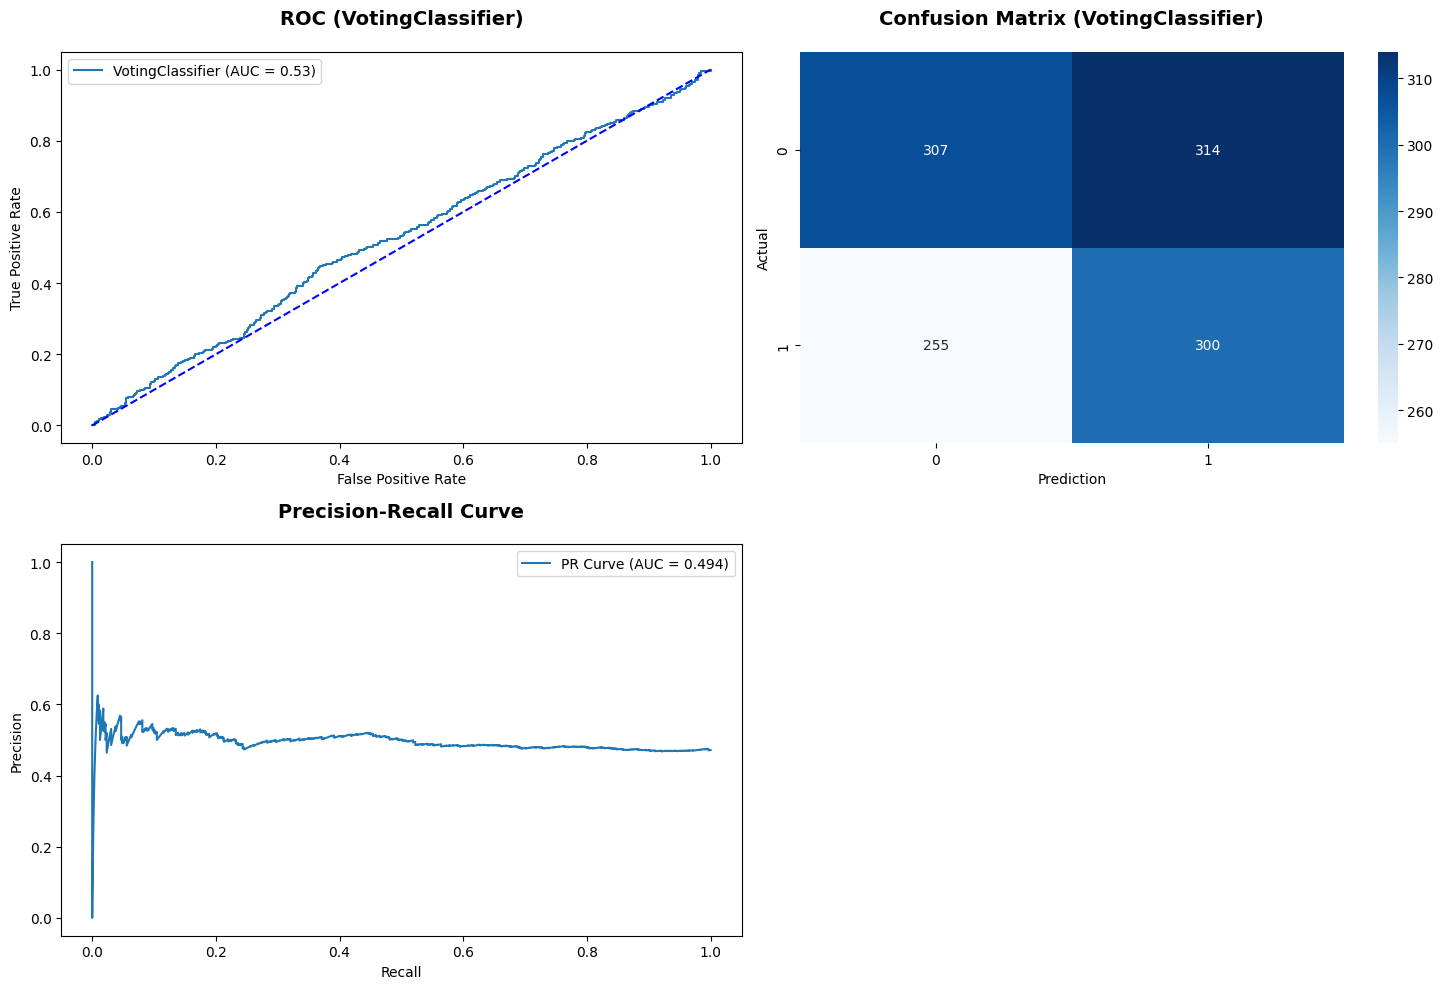

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       621
           1       0.49      0.54      0.51       555

    accuracy                           0.52      1176
   macro avg       0.52      0.52      0.52      1176
weighted avg       0.52      0.52      0.52      1176



In [181]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("etc", model_etc),
        ("rf", model_rf),
        ("dt", model_dt),
        ("hgb", model_hgb),
        ("xgb", model_xgb),
    ],
    voting="soft",
    weights=[rocScore_etc, rocScore_rf, rocScore_dt, rocScore_hgb, rocScore_xgb],
    n_jobs=-1
)

# X_cat = df_fraud_new_prepared.toarray() if hasattr(df_fraud_new_prepared, "toarray") else df_fraud_new_prepared
# X_val_prepared = X_val_prepared.toarray() if hasattr(X_val_prepared, "toarray") else X_val_prepared

rocScore_vc = evaluate_model(model = voting_clf_soft, X_train=df_new_prepared, X_val=X_val_prepared,
               y_train=df_label, y_val=y_val, figsize=(15, 10))

PermutationExplainer explainer: 1177it [01:10, 14.34it/s]                          


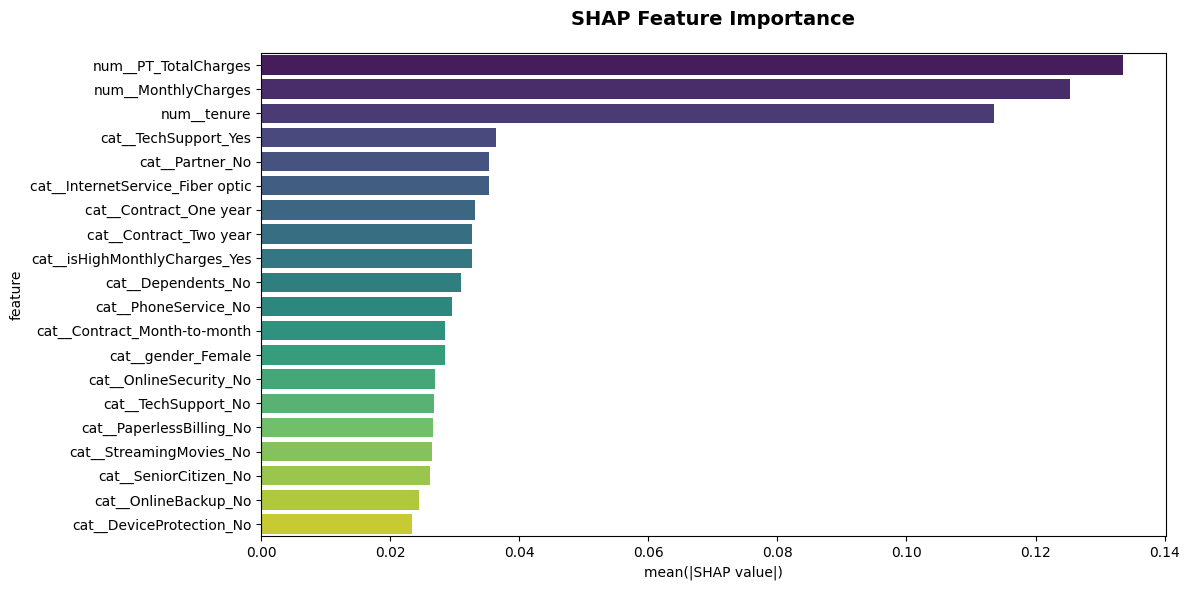

In [185]:
shap_plot(model=voting_clf_soft.named_estimators_["xgb"], X_test=X_val_prepared, 
          list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 1177it [01:08, 14.72it/s]                          


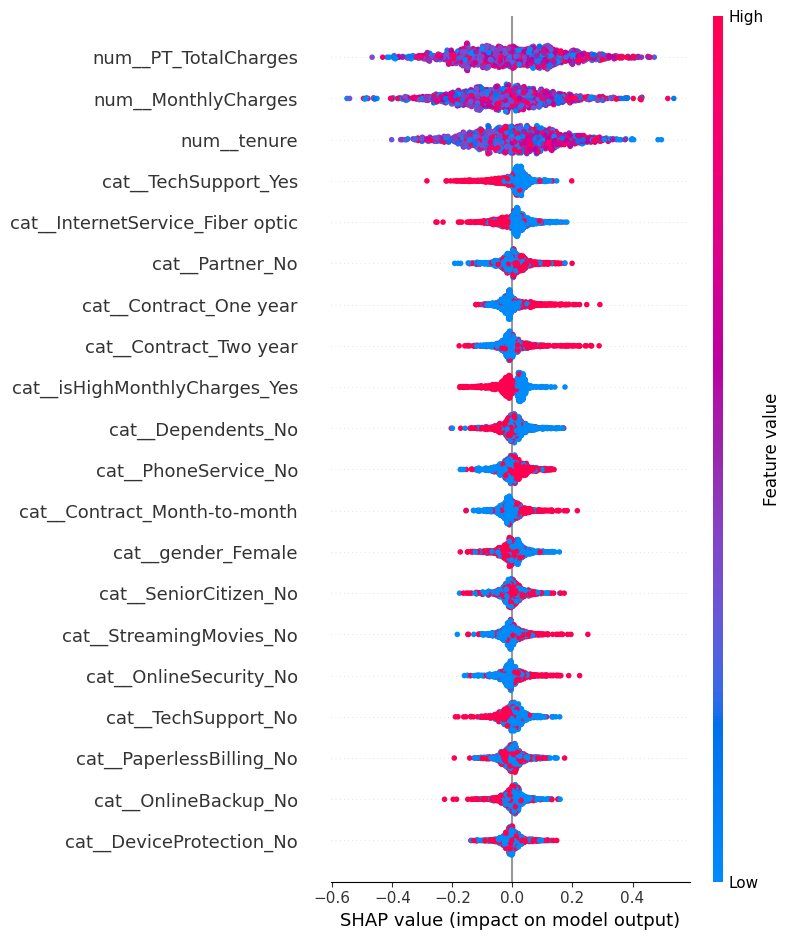

In [186]:
shap_plot(model=voting_clf_soft.named_estimators_["xgb"], X_test=X_val_prepared, 
          list_feature=list_feature_prepared)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>

**Most influential drivers**

* **num\_\_PT\_TotalCharges (cumulative spend)**: Higher values → **lower churn** (negative SHAP); lower values → **higher churn**. This proxies **tenure**—long-standing customers rarely leave.
* **num\_\_MonthlyCharges**: Higher monthly fees → **higher churn**; lower fees → **lower churn**.
* **num\_\_tenure**: Longer tenure → **lower churn**; new customers → **higher churn**.

These three dominate the signal.

**Categorical features (one-hot) and direction**

* **Support / security add-ons**

  * `cat__TechSupport_Yes`: **reduces churn**.
  * `cat__OnlineSecurity_No`, `cat__TechSupport_No`, `cat__OnlineBackup_No`, `cat__DeviceProtection_No`: **increase churn**.
    ⇒ Bundled support/security/backup helps retention.
* **Contract type**

  * `cat__Contract_One year`, `cat__Contract_Two year`: clear **churn reduction**.
  * `cat__Contract_Month-to-month`: **raises churn**.
    ⇒ Month-to-month customers are riskier; moving them to 12–24-month terms reduces churn.
* **Internet type**

  * `cat__InternetService_Fiber optic`: tends to **increase churn** (often tied to **higher MonthlyCharges**).
* **Household / demographics**

  * `cat__Partner_No`, `cat__Dependents_No`: **increase churn** (single / no dependents churn more).
  * `cat__SeniorCitizen_No` is slightly negative → implies **SeniorCitizen=Yes** is higher risk (common in telco data).
  * `cat__gender_Female`: negligible effect (near neutral).
* **Other services**

  * `cat__StreamingMovies_No`, `cat__PhoneService_No`, `cat__PaperlessBilling_No`: small positive effects (less embedded in the service ecosystem).

**Typical high-risk profiles (from beeswarm)**

* **High MonthlyCharges + month-to-month + no TechSupport/OnlineSecurity + low tenure** ⇒ strong positive SHAP → **very likely to churn**.
* **High TotalCharges / long tenure + 1–2 year contract + TechSupport** ⇒ negative SHAP → **stable**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>

* **Early-life** (low tenure): run **30–90 day onboarding/retention** programs.
* **High bill** customers: offer **bundles/discounts** or right-size plans to reduce perceived cost.
* **Contract conversion**: target **month-to-month** users with incentives to move to **1–2 year** terms.
* **Add-on upsell**: promote **TechSupport/OnlineSecurity** to at-risk segments.
* **Fiber segment**: monitor experience/pricing (often correlated with higher charges).

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
